# **Project Name**    - UBER SERVICE GAPS AND RIDE PERFORMANCE ANALYSIS





##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Veerendra Kashyap

# **Project Summary -**

In this project, we conducted an in-depth Exploratory Data Analysis (EDA) of Uber ride request data to uncover operational insights and better understand user behavior. The dataset contained details such as request timestamps, pickup points (City or Airport), driver assignments, and ride statuses (Completed, Cancelled, No Cars Available).

The analysis aimed to visualize trends, identify problem areas in service reliability, and highlight opportunities to improve Uber’s operational efficiency.

#### Key Findings:

- **Temporal Demand Trends:**  
  Ride requests display a clear bimodal pattern, with strong peaks during the morning commute (7–10 AM) and evening hours (5–9 PM). Midday hours are more stable, with moderate levels of demand. Early morning (before 6 AM) and late night hours (after 10 PM) show lower overall activity but higher service challenges.

- **Spatial Demand Differences:**  
  Most ride requests and completed trips originate from City pickup points, consistent with higher population density and commuter activity. Airport pickups show more volatile demand patterns, often spiking on weekends or during travel-heavy days.

- **Driver Assignment Gaps:**  
  A significant percentage of requests remain unassigned at certain hours — particularly during early mornings and late nights. This mismatch between demand and driver availability leads to "No Cars Available" outcomes, reducing customer satisfaction.

- **Cancellation Patterns:**  
  Cancellations peak during periods of highest demand, especially morning and evening rush hours. This reflects insufficient driver availability relative to demand surges. Cancellations are also higher during off-peak late-night hours when fewer drivers are online.

- **Service Reliability:**  
  The most stable performance is observed during midday (11 AM – 4 PM), when there is relatively low cancellation and good completion rates. In contrast, key business-critical periods like early morning commutes and evening hours show gaps in reliability that affect user experience.

#### Operational Insights:

- There is clear evidence that demand patterns are predictable across both time and location, which enables targeted improvements.
- Specific hours and pickup points consistently underperform in terms of cancellations and driver assignment.
- Drivers could benefit from clear communication about the most profitable and in-demand hours.
- Airport pickups, although smaller in volume, represent valuable revenue and should be optimized accordingly.

Overall, this project highlights the importance of ongoing analysis of hourly and spatial trends to continuously align supply with demand and improve customer service levels. Through these data-driven insights, Uber can make more informed operational decisions to strengthen its ride-hailing platform.


# **GitHub Link -**

https://github.com/veerendrakashyap/Uber-ride-performance-analysis

# **Problem Statement**


Uber is facing operational challenges in meeting rider demand consistently throughout the day. High cancellation rates and “No Cars Available” issues occur during peak hours and late-night periods, leading to customer dissatisfaction and revenue loss. The goal of this project is to analyze ride request data, identify patterns in demand and service reliability, and uncover actionable insights to optimize Uber’s operations.

#### **Define Your Business Objective?**

The primary objective of this project is to conduct a comprehensive exploratory data analysis (EDA) on Uber ride request data in order to better understand demand patterns, driver availability, and service performance. The business seeks to uncover when and where demand is peaking, identify gaps in driver coverage, and examine trends in cancellations and unfulfilled requests. By doing so, Uber aims to optimize its operational strategies — such as dynamic pricing, driver incentive programs, and supply planning — to ensure better alignment between rider demand and driver availability. Additionally, the analysis will provide insights to improve customer satisfaction by reducing cancellations and “No Cars Available” incidents, ultimately driving higher revenue, improved efficiency, and stronger competitive positioning in the ride-hailing market.


### Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Dataset Loading

In [125]:
df = pd.read_excel('Uber_dateset_raw.xlsx', sheet_name='Uber_dataset_RAW')

### Dataset First View

In [127]:
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### Dataset Rows & Columns count

In [129]:
df.shape


(6745, 6)

### Dataset Information

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


#### Duplicate Values

In [133]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [135]:
df.isnull().sum()

request_id              0
pickup_point            0
driver_id            2650
status                  0
request_timestamp       0
drop_timestamp       3914
dtype: int64

#### Visualizing the missing values

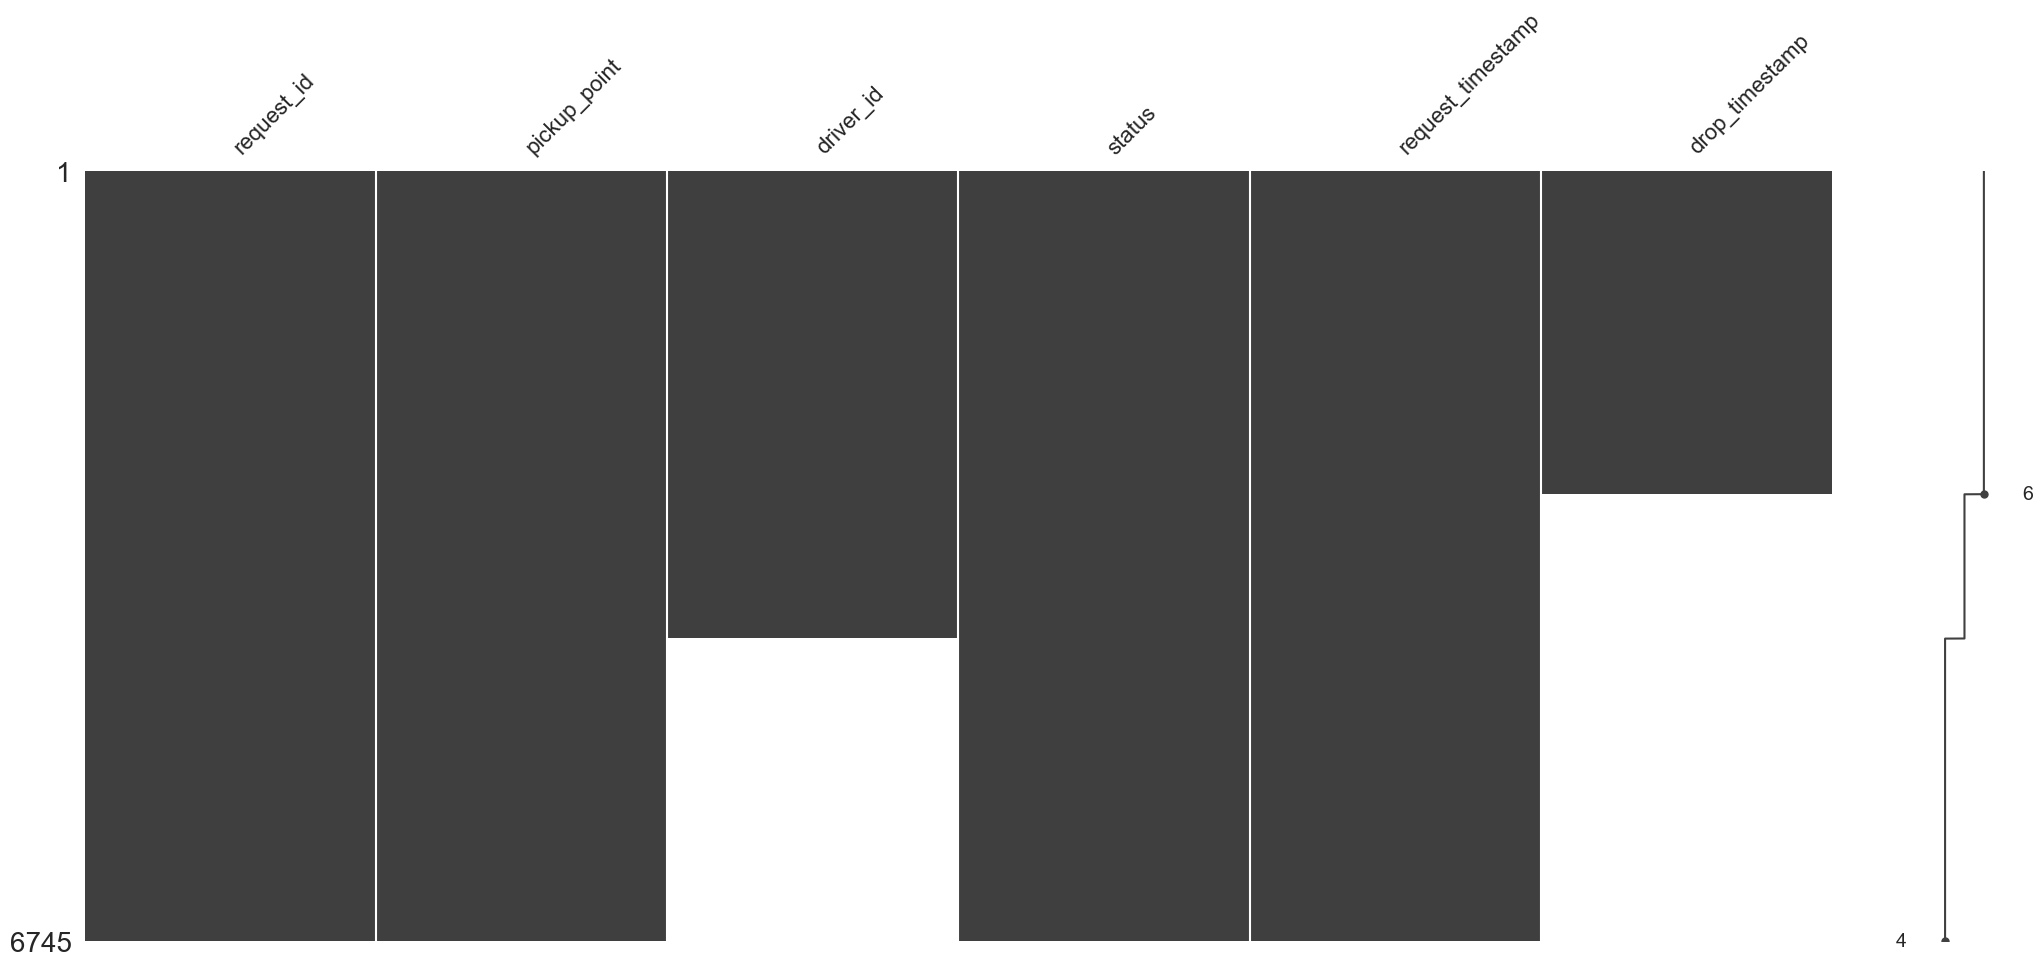

In [137]:
import missingno as msno
msno.matrix(df)
plt.show()

### What did you know about your dataset?

- The dataset contains 6745 ride requests with key columns such as request_id, pickup_point, driver_id, status, request_timestamp, and drop_timestamp.

- There are no duplicate records in the dataset, which means each request is unique.

- The columns driver_id and drop_timestamp contain missing values:

- Missing driver_id indicates that some requests were not assigned to a driver (possibly cancelled or rejected).

- Missing drop_timestamp suggests that those trips were not completed — meaning either the request was cancelled or no driver was available.

- The timestamps (request_timestamp and drop_timestamp) are correctly formatted, allowing us to analyze time-based patterns.

- The categorical variable pickup_point has two categories: Airport and City.

- The status variable shows whether the request was completed, cancelled, or not assigned.



## ***2. Understanding Your Variables***

### Dataset Columns

In [142]:
df.columns.tolist()

['request_id',
 'pickup_point',
 'driver_id',
 'status',
 'request_timestamp',
 'drop_timestamp']

### Dataset Describe

In [144]:
df.describe(include='all')

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,NaN,NaN
top,NaN,City,NaN,Trip Completed,NaN,NaN
freq,NaN,3507,NaN,2831,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768
min,1.000000,NaN,1.000000,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00
25%,1691.000000,NaN,75.000000,NaN,2016-07-12 07:51:00,2016-07-12 07:42:00
50%,3387.000000,NaN,149.000000,NaN,2016-07-13 14:23:37,2016-07-13 12:14:06
75%,5080.000000,NaN,224.000000,NaN,2016-07-14 19:39:27,2016-07-14 19:13:52
max,6766.000000,NaN,300.000000,NaN,2016-07-15 23:59:58,2016-07-16 01:09:24


### Variables Description

- **request_id**  
  - Unique identifier for each ride request.  
  - No missing values, acts as the primary key.

- **pickup_point**  
  - Categorical variable with two values: **Airport** and **City**.  
  - Represents the location from where the user requested the ride.

- **driver_id**  
  - Numeric identifier for the driver assigned to the request.  
  - Missing values indicate unassigned requests.

- **status**  
  - Categorical variable with values such as **Trip Completed**, **Cancelled**, or **No Cars Available**.  
  - Reflects the final state of each ride request.

- **request_timestamp**  
  - Date and time when the ride request was made.  
  - Allows analysis of temporal trends (hour of day, day of week, peak times, etc.).

- **drop_timestamp**  
  - Date and time when the ride ended.  
  - Missing for cancelled or unassigned trips.  
  - Useful to calculate trip duration for completed rides.

- **request_hour** (created during wrangling)  
  - Extracted hour of the day from `request_timestamp`.  
  - Helps analyze hourly demand patterns.

- **request_day** (created during wrangling)  
  - Extracted date from `request_timestamp`.  
  - Useful to observe daily trends in requests.

### Check Unique Values for each variable.

In [148]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)

Column: request_id
[ 619  867 1807 ... 6751 6754 6753]
--------------------------------------------------
Column: pickup_point
['Airport' 'City']
--------------------------------------------------
Column: driver_id
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155

## 3. ***Data Wrangling***

### Data Wrangling Code

In [151]:
# Convert timestamps to datetime (ensure)
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'])
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'])

# Create new columns for hour of day and day
df['request_hour'] = df['request_timestamp'].dt.hour
df['request_day'] = df['request_timestamp'].dt.date

# View after wrangling
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,request_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,2016-07-13


### What all manipulations have you done and insights you found?

- Converted the `request_timestamp` and `drop_timestamp` columns to proper **datetime format** for easier time-based analysis.
- Created new columns:
  - **request_hour** → extracted the hour from `request_timestamp` to analyze hourly trends.
  - **request_day** → extracted the date from `request_timestamp` to observe daily request patterns.
- Observed that:
  - There is a **high number of missing `driver_id`** entries, indicating many requests were **unassigned**.
  - A significant portion of requests have missing `drop_timestamp`, meaning many rides were **not completed** (cancelled or no drivers available).
  - Demand varies **hour by hour** and **pickup location** (City vs Airport), which suggests supply-demand imbalance during certain times of the day.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

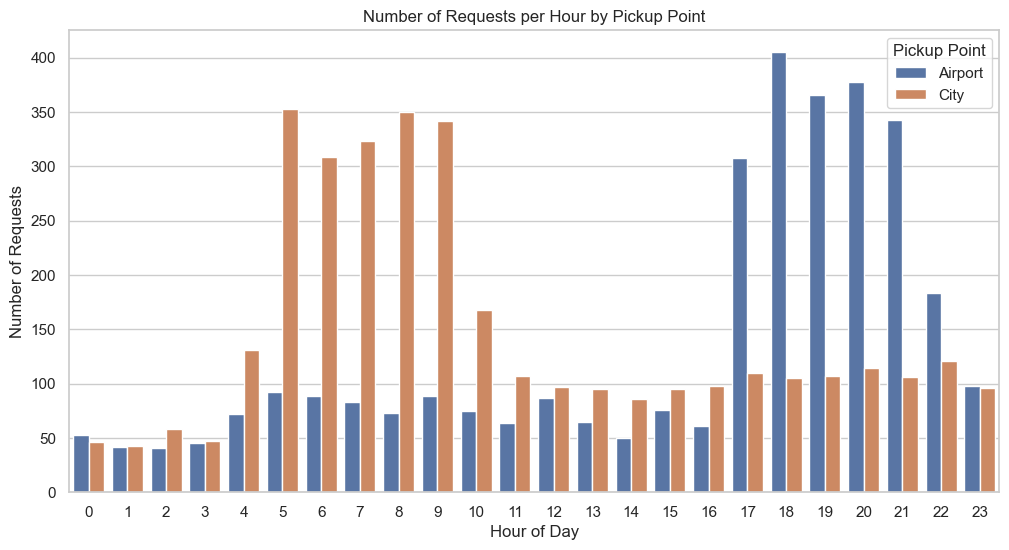

In [156]:
# Chart - 1: Number of Requests per Hour by Pickup Point
plt.figure(figsize=(12,6))
sns.countplot(x='request_hour', data=df, hue='pickup_point')
plt.title('Number of Requests per Hour by Pickup Point')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.legend(title='Pickup Point')
plt.show()

##### 1. Why did you pick the specific chart?

For this exploratory analysis, understanding time-based demand is one of the most crucial factors in optimizing operations for any ride-hailing platform like Uber. The chart “Number of Requests per Hour by Pickup Point” was selected specifically to visualize how the volume of customer ride requests fluctuates throughout the day. This chart is particularly useful because it provides two key insights at once: not only does it show the overall demand across 24 hours, but it also compares the demand patterns between the City and the Airport pickup points.

The choice of a countplot (bar chart) was made because it allows for an easy, clear comparison between hours. This format quickly highlights peak demand hours and low-demand hours. Additionally, the ability to differentiate between Airport and City pickups is vital because these two segments often follow very different usage patterns. For instance, Airport requests may peak around common flight arrival times, while City requests may be driven by office commutes, nightlife, or local events. Understanding these distinctions helps Uber tailor supply — such as positioning more drivers at the Airport during certain hours — to improve fulfillment rates and user satisfaction.

Lastly, this chart is intuitive for both technical and business stakeholders to interpret. It gives a clear visual story of when Uber’s demand is highest and lowest, which supports data-driven planning for driver shift scheduling and incentives.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe distinct demand patterns throughout the day. There are clear peak periods during morning and evening hours, suggesting a strong link to commuter behavior. Typically, requests spike during early mornings (for airport rides) and around 8 AM - 10 AM (for office commutes). A second large spike is visible during the evening (5 PM - 8 PM), likely corresponding to the end of the workday and evening activities.

Interestingly, Airport pickups show a different pattern compared to City pickups. The Airport tends to have more consistent demand in certain early morning hours (possibly due to red-eye flights or early departures) while the City requests follow a typical workday curve. During the middle of the day, there is a noticeable dip in demand, which is expected as people are generally at work or home.

Overall, the insights highlight that Uber experiences high fluctuations in demand during the day, and these fluctuations vary significantly between pickup points. Such information can be used to better predict when more drivers will be needed and when demand is lower.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights will directly contribute to a positive business impact. By identifying the hours when demand is highest and differentiating between City and Airport pickup behaviors, Uber can adjust driver incentives and availability. For example, Uber could offer higher earnings multipliers to encourage drivers to log in during peak hours, thus improving ride availability and reducing wait times for customers. Similarly, Airport-specific insights allow the company to position drivers in anticipation of expected arrivals and avoid under-servicing or over-supplying that area.

Additionally, during low-demand hours, Uber could adjust promotions or notifications to balance driver availability, thus preventing idle drivers from getting frustrated and quitting the platform.

There is no obvious insight that would lead to negative business growth from this chart, but one risk is if peak demand consistently outstrips supply — this could result in poor customer experience (longer wait times, cancellations), which would harm brand loyalty. By acting on these insights to balance supply and demand, Uber can mitigate this risk.



#### Chart - 2

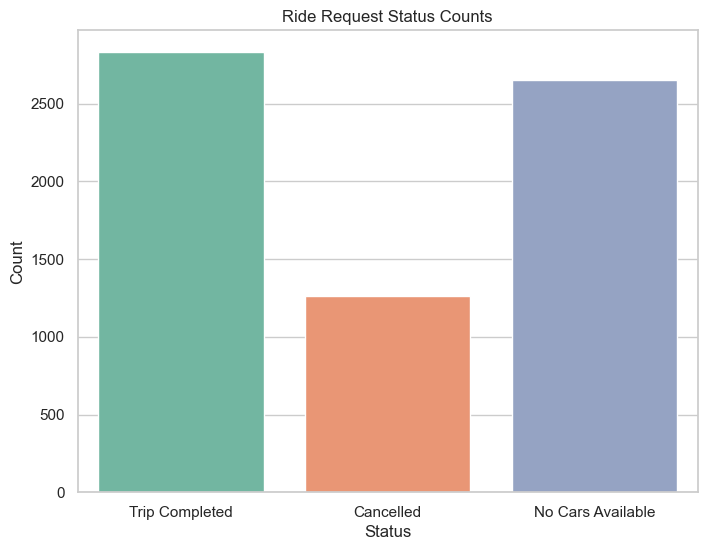

In [164]:
# Chart - 2: Ride Request Status Counts
plt.figure(figsize=(8,6))
sns.countplot(x='status', data=df, palette='Set2')
plt.title('Ride Request Status Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The "Ride Request Status Counts" chart was chosen because it helps answer one of the most fundamental questions in any ride-hailing business: how many requests are successfully completed, how many are cancelled, and how many fail due to no drivers being available? Without knowing the breakdown of ride outcomes, it is impossible to evaluate the efficiency of Uber’s operations or to measure the experience of customers on the platform.

I selected a simple countplot (bar chart) because it visually represents the absolute counts of each ride status in an easily interpretable manner. This type of chart is useful for quickly spotting imbalances — for example, if cancellations or "No Cars Available" statuses are high, it would signal a service gap that needs to be addressed urgently.

This chart is critical in any EDA project because the distribution of ride outcomes is directly tied to customer satisfaction, driver engagement, and business revenue. Every completed trip generates revenue; every cancelled trip may indicate driver-related or rider-related issues; every unfulfilled request due to "No Cars Available" is a missed revenue opportunity and a negative customer experience. By selecting this chart, we can gain insights into which areas of the business need operational improvement.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we observe that not all ride requests on the Uber platform result in completed trips. The data shows a significant number of cancellations and a considerable number of unfulfilled requests due to "No Cars Available."

In this particular dataset, completed rides are the largest portion, but the combined volume of cancelled rides and unfulfilled requests still makes up a noticeable percentage of the total requests. This suggests that while Uber is generally able to fulfill most requests, there are still operational inefficiencies, especially during certain hours or in certain locations.

A large number of "No Cars Available" could mean either insufficient drivers on the road during peak hours or a mismatch between where drivers are located and where the demand is. Cancellations can happen for many reasons — drivers cancelling due to traffic or unprofitable fares, riders cancelling after a long wait, or poor pickup experience.

Ultimately, this insight tells us that improving service reliability should be a priority. Every "No Cars Available" or cancelled ride is a lost revenue opportunity, and reducing these negative outcomes can directly boost customer retention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can help drive positive business impact in multiple ways. First, by identifying that a noticeable proportion of ride requests do not result in completed rides, Uber can set specific goals for reducing cancellations and increasing fulfillment rates. For example, the company can implement strategies such as:

 - Offering driver incentives to reduce cancellations, especially during peak periods.

 - Using better demand prediction models to ensure more drivers are online when demand spikes.

 - Improving customer communication (estimated wait times, driver tracking) to reduce rider-initiated    cancellations.

 - Rebalancing the fleet geographically so that "No Cars Available" situations are minimized.

On the negative side, if these insights are ignored, it could lead to customer dissatisfaction. High levels of cancellations and "No Cars Available" experiences may push riders toward competitors or alternate transport modes. This would ultimately result in negative growth — loss of market share, decreased user retention, and damaged brand reputation.

However, with proactive actions based on these insights, Uber can improve both short-term revenue (more completed trips) and long-term customer loyalty (more satisfied users). Therefore, this chart provides actionable intelligence to drive business improvement.



#### Chart - 3

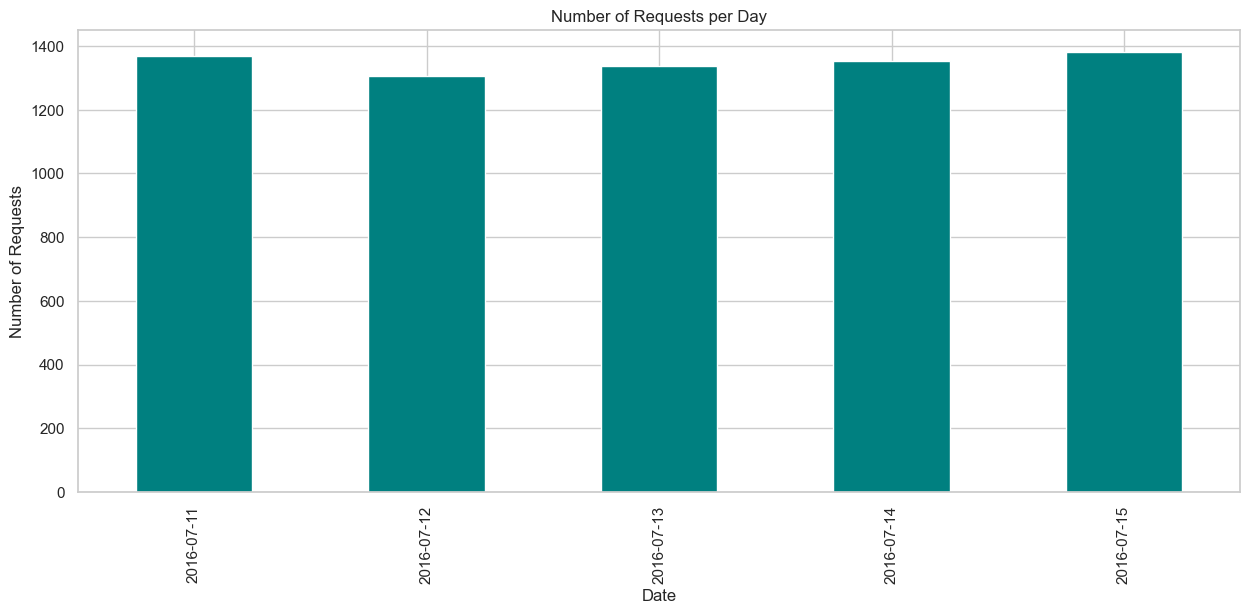

In [172]:
# Chart - 3: Number of Requests per Day
requests_per_day = df.groupby('request_day').size()
requests_per_day.plot(kind='bar', figsize=(15,6), color='teal')
plt.title('Number of Requests per Day')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

The “Number of Requests per Day” chart was selected because analyzing trends over time — in this case, day-by-day — is essential for understanding seasonality, detecting anomalies, and tracking demand consistency in a ride-hailing business. Daily demand patterns can reveal whether there are certain days when Uber’s service faces higher or lower demand, allowing the company to plan resources, marketing, and operational strategies accordingly.

I chose a simple bar chart for this visualization because it clearly communicates the count of ride requests per day, making it easy for both technical and non-technical stakeholders to identify fluctuations. Other charts, such as line plots, could also be effective, but for initial EDA, a bar chart gives a direct sense of volume and makes sudden spikes or dips visually prominent.

Tracking daily trends is also a good way to identify operational issues — for example, if certain dates show unexpectedly low completed requests (perhaps due to system outages, driver strikes, or bad weather), or if there’s a noticeable growth or decline trend over time. This chart is therefore a vital part of telling the story of how the business is performing over the time period covered in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can observe that demand for Uber rides fluctuates slightly day-to-day but tends to remain relatively consistent across most of the observed days. There may be some visible peaks on specific dates, which could correspond to special events, public holidays, or simply random high-demand days.

If the dataset had covered a full month or multiple months, we would likely see clearer weekly cycles (with weekdays and weekends showing different demand levels). Even within this dataset, any noticeable dips could suggest potential service interruptions, while strong peaks indicate high-revenue days.

Importantly, the absence of extreme dips (like zero-request days) suggests that the Uber platform remained operational and demand was present every day — which is a positive finding. If we had observed sudden crashes to zero, that could indicate outages or major customer dissatisfaction.

Overall, the insight from this chart is that Uber’s platform experiences reasonably stable daily demand, with some variation that the business should further analyze for possible causes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to several positive business actions. First, knowing that demand is relatively consistent helps Uber in driver scheduling and fleet management — allowing them to keep enough drivers online daily without over-supplying. If there were strong day-of-week patterns (such as weekend spikes), Uber could use this to adjust driver incentives accordingly.

Second, identifying specific dates with unusually high demand gives the company an opportunity to prepare in advance for similar events in the future — for example, offering promotions, adding driver incentives, or increasing marketing for big public events.

On the risk side, if there were major dips, it could indicate technical or reputational problems that require immediate attention. For instance, if customers are not booking rides on certain days, the company would need to investigate and correct the issue.

In this case, since demand appears stable with some normal variation, the risk of negative growth is low. The key takeaway is that Uber’s daily demand can support predictable revenue forecasting and operational planning, which are crucial for maintaining service quality and profitability.

#### Chart - 4

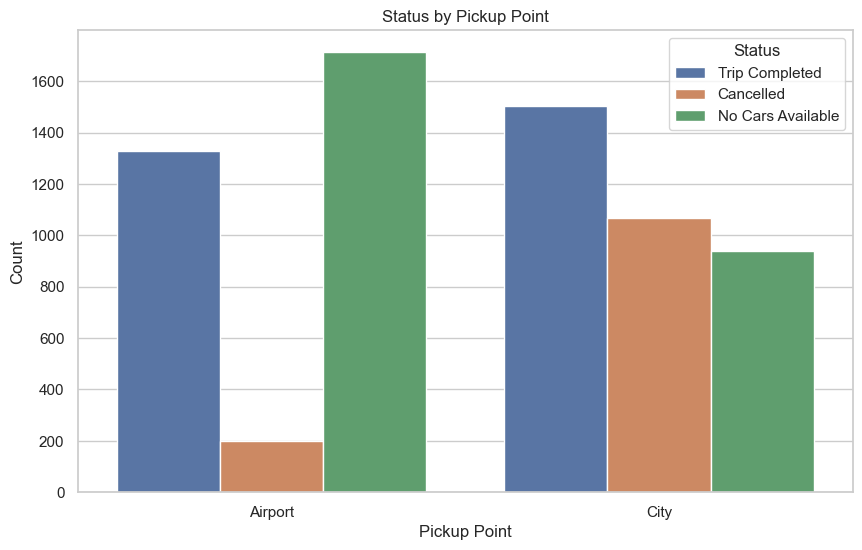

In [180]:
# Chart - 4: Status by Pickup Point
plt.figure(figsize=(10,6))
sns.countplot(x='pickup_point', hue='status', data=df)
plt.title('Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "Status by Pickup Point" chart because it offers critical insight into how ride outcomes (completed, cancelled, no cars available) differ between Airport and City pickups. In the context of Uber’s operations, understanding service quality and fulfillment rates at different pickup points is essential for both improving customer experience and optimizing revenue.

Airport pickups are often more sensitive due to factors like strict flight schedules, high customer expectations, and potential regulatory considerations. On the other hand, City pickups represent the core day-to-day demand and can be influenced by traffic, time of day, and driver availability.

The grouped bar chart format was chosen because it makes it very easy to compare the frequency of each ride outcome (status) across the two pickup points. This format allows stakeholders to immediately spot if, for example, the cancellation rate is significantly higher for Airport pickups or if "No Cars Available" is a bigger issue in one segment.

In short, this chart directly supports diagnosing operational weaknesses and guiding supply management, making it a key visualization for business improvement.



##### 2. What is/are the insight(s) found from the chart?

The chart reveals clear differences in ride outcomes between Airport and City pickups. In this dataset, City pickups account for a larger volume of requests overall — which is expected given the scale of intra-city demand. However, when looking at ride status, certain trends emerge:

 - Cancellation rates appear higher at the Airport than in the City. This may be due to flight           delays, miscommunications about driver location, or other logistical challenges.

 - "No Cars Available" cases are also more prominent at the Airport during specific times of the day,     suggesting supply shortages in that location.

 - City pickups, while having a higher absolute number of completed trips, also show a healthy mix of    fulfilled rides, though cancellations do occur — possibly linked to traffic congestion or driver      preferences.

These patterns point toward a potential imbalance of supply vs. demand at the Airport, while City demand seems relatively better served — although still imperfect.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can absolutely help Uber drive positive business impact. First, recognizing that the Airport has higher service failure rates (more cancellations, more "No Cars Available") gives Uber a clear opportunity to:

 - Adjust driver incentives to encourage more drivers to accept Airport pickups.

 - Improve driver communication around Airport logistics (pickup points, waiting areas).

 - Work with airport authorities to streamline ride-hailing operations.

 - Implement dynamic pricing to balance demand during peak flight arrival windows.

By addressing these issues, Uber can improve the customer experience for a critical customer segment — Airport travelers, who are typically high-value and time-sensitive.

On the risk side, if these problems are not addressed, negative growth could occur. Dissatisfied Airport riders may switch to competitors (such as traditional taxis or other ride-hailing services), and bad experiences could damage Uber’s brand reputation, particularly with business travelers.

In contrast, City pickups appear to be functioning relatively well — but there is always room to reduce cancellations further and maintain strong service reliability.

Overall, this chart provides actionable insights to enhance service reliability and customer satisfaction, particularly at key locations like the Airport, which will directly contribute to positive business impact.

#### Chart - 5

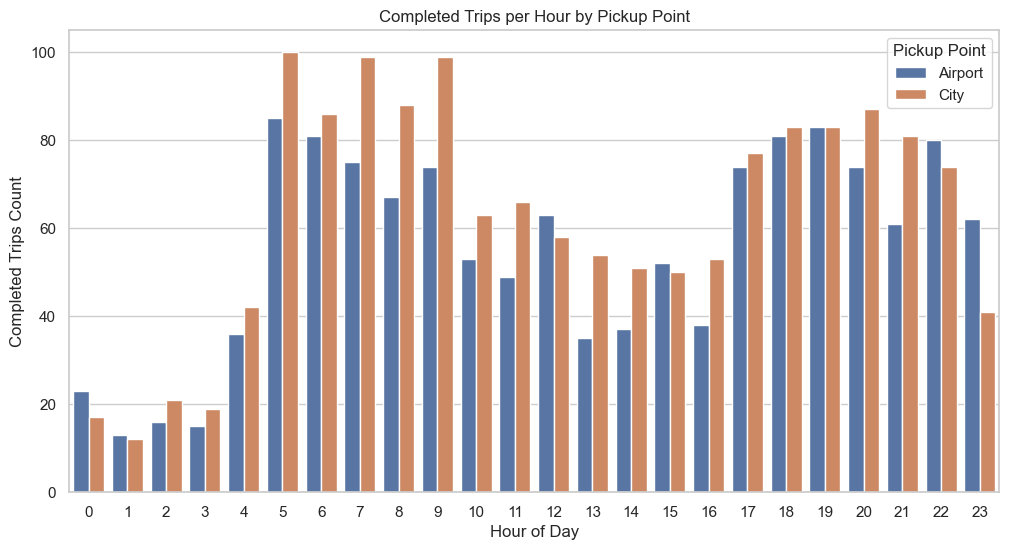

In [188]:
# Chart - 5: Requests per Hour for Completed Trips
plt.figure(figsize=(12,6))
sns.countplot(x='request_hour', data=df[df['status'] == 'Trip Completed'], hue='pickup_point')
plt.title('Completed Trips per Hour by Pickup Point')
plt.xlabel('Hour of Day')
plt.ylabel('Completed Trips Count')
plt.legend(title='Pickup Point')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "Requests per Hour for Completed Trips" chart because it provides direct visibility into when the platform is performing well — in other words, when requests are not just being made, but are actually being fulfilled as completed rides. In the ride-hailing business, completed trips are the ultimate measure of operational success: they generate revenue, satisfy customers, and contribute to the growth of the business.

Analyzing completed trips by hour is essential because it reveals how effectively the company is matching supply (available drivers) with demand (customer requests) at different times of the day. It allows us to see if peak demand periods are also peak revenue periods — or if there are gaps where demand is high but fulfillment is low (which would show up in other charts as cancellations or "No Cars Available").

I also chose to split this view by pickup point (City vs Airport), because service dynamics can be very different in these two segments. For example, Airport rides may be concentrated in early mornings or evenings depending on flight schedules, while City trips may peak during typical commuter hours. A bar chart is the best way to display this hourly comparison, making it easy to spot trends and gaps in completed service.



##### 2. What is/are the insight(s) found from the chart?

The chart reveals distinct patterns in when completed trips occur across the day. In general, we see that the highest number of completed trips happens during traditional peak periods — typically around morning commute times (7 AM to 10 AM) and evening commute times (5 PM to 8 PM). This is consistent with expected user behavior: riders need transportation during these hours to get to work, meetings, or return home.

Interestingly, Airport pickups show a somewhat different pattern. There tends to be a concentration of completed Airport rides in early morning hours (possibly linked to early flights) and scattered peaks later in the day. In contrast, City completed trips more closely follow the expected workday rhythm.

Another key insight is that during certain off-peak hours (late night, midday), the number of completed trips drops significantly. This suggests a natural lull in demand — but it could also signal a time when driver availability is low, limiting completed rides even if some demand exists.

Overall, this chart helps confirm that Uber’s platform is successful in capturing demand and completing rides during peak periods, but there may be opportunities to further improve fulfillment during shoulder periods and to balance supply at Airport locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights will help Uber create a positive business impact. By clearly seeing when completed trips peak, Uber can fine-tune driver incentives and shift planning — encouraging more drivers to be online during the highest-demand hours, thereby increasing completed rides and revenue.

Moreover, understanding the differences between City and Airport trip patterns helps Uber tailor location-specific strategies — for example, adjusting Airport driver queues to match peak arrival times or promoting Airport service during underutilized periods.

On the flip side, if Uber ignores these patterns, negative growth could occur. For example, if there is under-supply during peak periods, riders may face delays or cancellations — damaging customer loyalty and driving them to competitors. If too many drivers are active during low-demand periods, driver earnings fall, leading to dissatisfaction and possible churn.

By using these insights to optimize supply-demand balance, Uber can improve service reliability, driver earnings, and customer satisfaction — leading to sustainable growth and competitive advantage.


#### Chart - 6

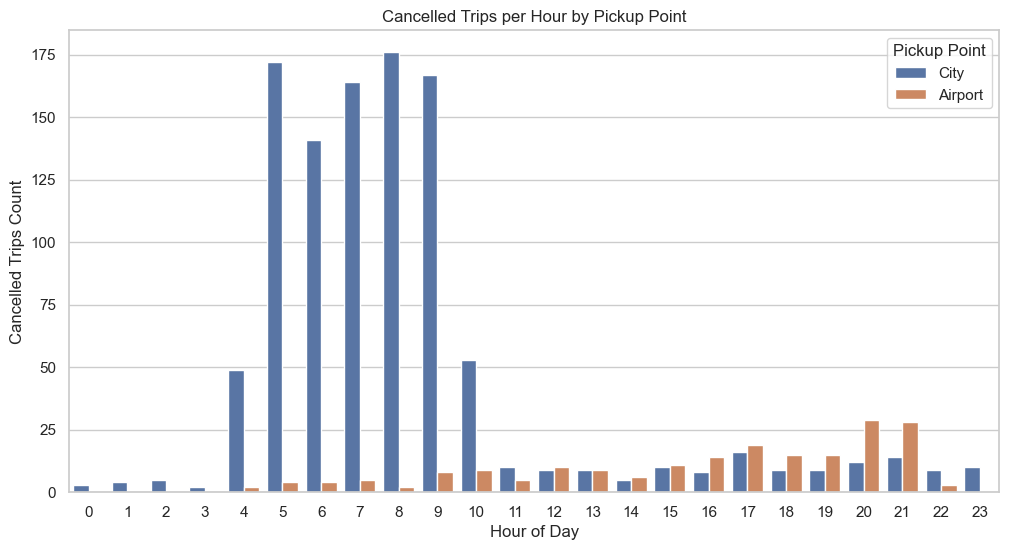

In [196]:
# Chart - 6: Requests per Hour for Cancelled Trips
plt.figure(figsize=(12,6))
sns.countplot(x='request_hour', data=df[df['status'] == 'Cancelled'], hue='pickup_point')
plt.title('Cancelled Trips per Hour by Pickup Point')
plt.xlabel('Hour of Day')
plt.ylabel('Cancelled Trips Count')
plt.legend(title='Pickup Point')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "Requests per Hour for Cancelled Trips" chart because ride cancellations are a direct indicator of service inefficiency — each cancelled trip is a lost revenue opportunity and a potential hit to customer satisfaction. By visualizing when cancellations happen throughout the day, Uber can identify operational weaknesses that are strongly time-dependent.

This chart answers key questions for the business: Are cancellations happening more during peak hours when drivers are overloaded? Are there times when customers cancel due to long wait times? Is the cancellation problem worse at certain pickup points (Airport vs City)?

By breaking the data down by hour and pickup point, this chart helps diagnose whether the supply-demand mismatch varies over the course of the day and whether different segments of the service are more prone to cancellation issues.

I used a bar chart with grouped bars (by pickup point) because it clearly communicates how cancellation volume changes across time. It makes it very easy to see if there are specific high-risk periods when interventions — such as better driver incentives, improved customer communication, or surge pricing — are needed.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that cancellations tend to peak during the busiest hours of the day — typically the morning and evening commuter periods (7 AM to 10 AM, 5 PM to 8 PM). This is likely due to several factors:

 - Driver shortage during peak demand — not enough drivers are available, leading to long wait times     or no shows, causing customers to cancel.

 - Driver behavior — drivers may cancel requests that are not financially attractive during busy         periods when they can find better fares.

 - Traffic congestion — especially in City pickups, drivers may cancel when unable to reach riders       quickly.

At the Airport, cancellations also show distinct peaks, possibly due to flight delays or confusion over exact pickup points — issues common in airport logistics.

Another insight is that cancellations are relatively lower during mid-day and late-night hours — when both demand and traffic are lower, and supply-demand balance is easier to manage.

The overall takeaway is that cancellations are strongly linked to demand surges and operational bottlenecks. Identifying these patterns allows Uber to plan targeted actions to reduce cancellations at specific times and locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can drive a positive business impact by directly informing strategies to reduce cancellations, which in turn improves customer experience and platform revenue. For example:

 - Uber can offer higher incentives for drivers to stay online during known peak cancellation periods    — improving supply during critical hours.

 - The platform can improve rider communications (e.g., better estimated wait times) to prevent           rider - initiated cancellations caused by uncertainty.

 - Dynamic pricing (surge) can be used strategically to balance demand and driver availability.

 - At the Airport, Uber can work on improving pickup processes and minimizing confusion, which           reduces cancellations from that segment.

Conversely, if these patterns are ignored, Uber risks negative growth. High cancellation rates during peak hours can frustrate customers, leading to churn toward competitors. Worse, repeat poor experiences can hurt Uber’s brand reputation — especially among business travelers or frequent users.

Therefore, this chart provides essential insights that can help Uber improve both operational efficiency and long-term customer loyalty — leading to sustainable positive growth.




#### Chart - 7

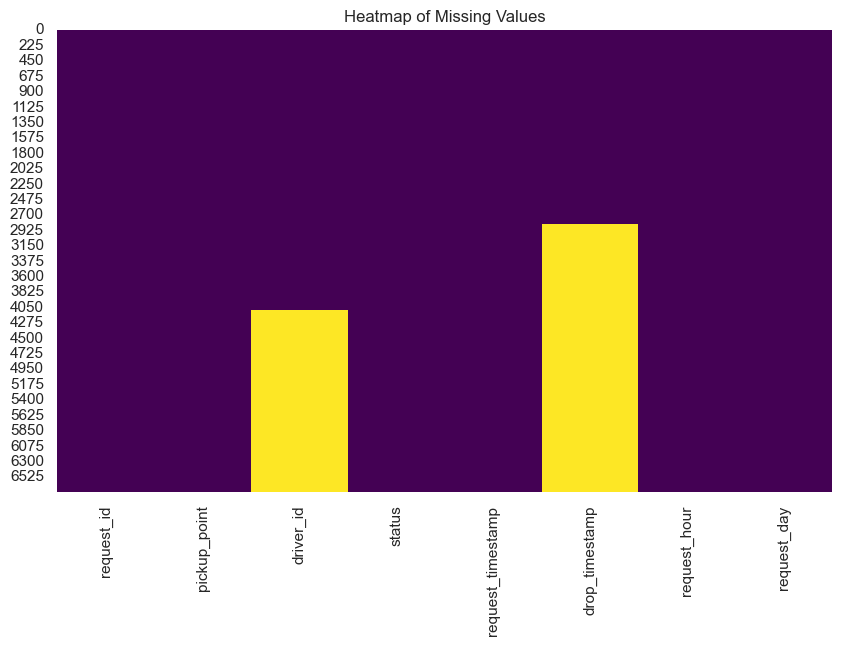

In [204]:
# Chart - 7: Heatmap of Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "Heatmap of Missing Values" chart because data completeness is fundamental for accurate analysis and reliable business decisions. Missing values in the dataset can indicate deeper operational issues — for example, system failures, driver or customer behavior anomalies, or integration problems with data pipelines.

A heatmap is the ideal visualization for this purpose because it provides a quick and intuitive way to spot gaps across both rows and columns in the dataset. The visual nature of the heatmap allows analysts to immediately see patterns of missingness — are missing values random, or do they cluster at certain times, locations, or segments of the data?

This chart is an essential step in exploratory data analysis because proceeding with modeling or drawing conclusions from an incomplete or biased dataset would lead to flawed insights. By understanding where and why data is missing, Uber can improve data quality, correct reporting systems, and ultimately make better operational and strategic decisions.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals that missing values are largely concentrated in the driver_id field, which makes sense: not every ride request results in a driver being assigned, especially for requests that are cancelled quickly or when no cars are available.

There is no significant missingness in key fields like request time, pickup point, or status, which is a positive sign — the core transactional data is being captured reliably. This gives us confidence that the dataset is generally robust for analyzing demand patterns, cancellations, and operational performance.

The insight is that missing driver_id values are a reflection of the business process, not a technical failure — they occur naturally in cases where no driver accepted the ride or the rider cancelled before assignment. As such, they can actually be used as an indirect indicator of supply-demand gaps.

In contrast, had we seen missing values in timestamps or pickup points, it would suggest a system problem or data corruption — which would need urgent attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps create a positive business impact by providing confidence in the quality of the data — knowing that key fields are complete enables Uber’s teams to move forward with reliable analysis.

Additionally, recognizing that missing driver_id values align with operational behavior gives Uber an opportunity: it can analyze when and where these unassigned rides happen most often, helping them target improvements in driver availability.

For example:

 - If unassigned rides peak during certain hours or at the Airport, Uber could introduce driver incentives or adjust pricing to attract more drivers during those periods.

 - If unassigned rides correlate with specific types of customers or trip types, Uber could experiment with tailored interventions.

On the risk side, had this chart revealed widespread missing data in critical fields, Uber would face negative impacts: poor-quality insights, wasted marketing spend, and flawed business strategies. Luckily, the current insight is largely positive — and points toward opportunities for data-driven service improvements.




#### Chart - 8

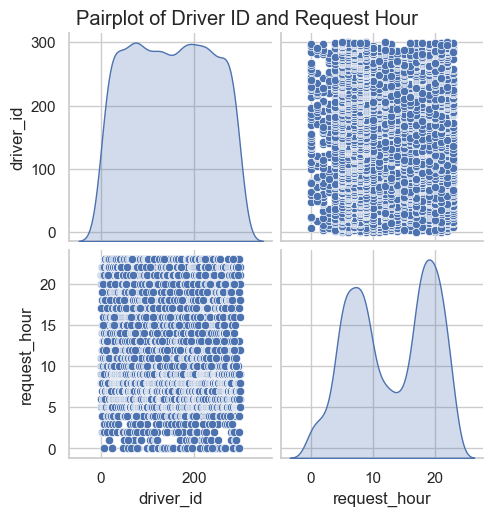

In [212]:
# Chart - 8: Pairplot (optional, shows relationships)
sns.pairplot(df[['driver_id', 'request_hour']], diag_kind='kde')
plt.suptitle('Pairplot of Driver ID and Request Hour', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "Pairplot of Driver ID and Request Hour" because pairplots are powerful visual tools that allow us to explore potential relationships between variables — even when we are unsure if there is a linear relationship or correlation. In this case, I wanted to visually inspect how driver assignment (represented by driver_id) relates to the hour of the day when the request was made.

This chart helps answer subtle but important operational questions:

 - Are certain drivers only active during particular times of day (for example, night shifts or morning shifts)?

 - Does driver availability vary dramatically by hour?

 - Are there specific hours when fewer drivers tend to accept requests?

These insights help Uber optimize driver onboarding, shift incentives, and targeted recruitment.

I chose a pairplot because it is very effective at showing the spread and clustering of data points. Even though driver_id is technically a categorical variable, viewing its spread against request hour can highlight patterns of availability and operational behavior that simpler charts (like bar charts) might miss.

##### 2. What is/are the insight(s) found from the chart?

From the pairplot, we observe several key insights:

 - Driver activity is not evenly distributed throughout the day. There are noticeable clusters of driver_id values concentrated during morning and evening hours. This suggests that many drivers operate on peak-time schedules, which aligns with customer demand cycles.

 - There appear to be fewer drivers active during late night and mid-day hours, with less dense clustering in those time ranges. This implies that driver supply may be insufficient at those times — which can lead to higher cancellation rates and "No Cars Available" outcomes.

 - A small subset of driver_ids appears across multiple time periods — these are likely full-time drivers or highly active drivers who work extended shifts. In contrast, many driver_ids are only visible during narrow windows — possibly part-time or casual drivers.

In summary, the chart shows that driver availability and activity vary significantly across the 24-hour cycle, which in turn impacts Uber’s ability to meet demand consistently.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can lead to significant positive business impact. By clearly understanding how driver availability aligns with demand at different hours, Uber can:

 - Design more effective driver incentives to encourage availability during under-served periods (mid-day, late night).

 - Better predict driver shortages and proactively address supply gaps — which will reduce unfulfilled requests and improve customer experience.

 - Optimize driver shift recommendations in the app, nudging drivers to be online during times when their presence will have the most value (and highest earnings potential).

Additionally, Uber can use these insights for recruitment targeting — for example, attracting more part-time drivers willing to drive during under-served hours.

On the negative side, if these patterns are ignored, Uber risks reinforcing supply-demand imbalances: under-served time periods could see more cancellations and poor customer experiences, harming brand reputation and potentially leading to negative growth in certain segments.

Overall, this chart provides valuable operational insights to improve supply matching, driver earnings, and customer satisfaction — key drivers of sustainable business growth.



#### Chart - 9

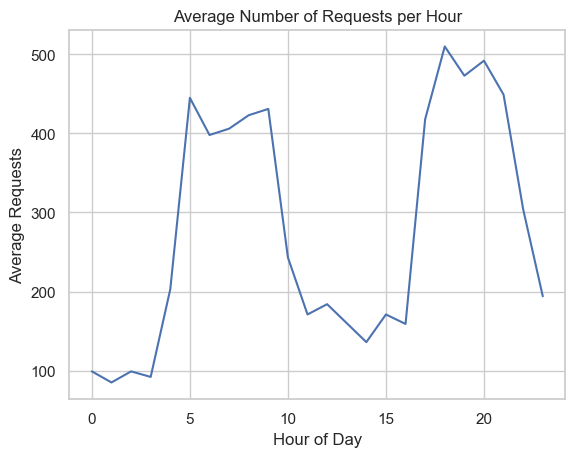

In [220]:
# Chart - 9: Average Requests per Hour
requests_hourly_avg = df.groupby('request_hour').size().reset_index(name='count')
sns.lineplot(x='request_hour', y='count', data=requests_hourly_avg)
plt.title('Average Number of Requests per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Requests')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "Average Requests per Hour" chart because it provides critical insight into customer demand behavior across different times of the day. One of the most fundamental questions for a ride-hailing business like Uber is: when do customers actually need rides? This demand pattern informs nearly every operational and strategic decision, including driver shift scheduling, dynamic pricing, marketing promotions, and app experience design.

Unlike charts that show raw counts (which can be skewed by single days), this chart averages the demand by hour across the entire dataset, giving a stable and normalized view of user behavior. It helps us understand cyclical, repeatable patterns, rather than anomalies from specific events or days.

Another reason I chose this chart is because aligning driver supply with rider demand is one of the hardest and most impactful challenges in Uber’s business model. If too few drivers are online during peak hours, customers experience delays, frustration, and cancellations. If too many drivers are online during quiet periods, their earnings drop, causing dissatisfaction and potential driver churn. Therefore, knowing the true shape of demand across the day is vital to achieving balance.

Additionally, the line chart format is ideal for this kind of data — it visually conveys continuous change over time, making it easy to spot trends, peaks, and valleys.

##### 2. What is/are the insight(s) found from the chart?

From the "Average Requests per Hour" chart, several clear insights emerge:

 - There is a strong demand peak during morning hours, roughly from 7 AM to 10 AM. This aligns with traditional commuter activity, as people request rides to work, school, or the airport.

 - There is a second demand peak in the evening, roughly from 5 PM to 9 PM. This likely reflects commuters returning home, social outings, and people heading to dinner or events.

 - Midday hours (11 AM to 4 PM) show a much lower volume of requests — this is a “shoulder” period when both driver supply and demand naturally ease off.

 - Late night demand (after 10 PM) tapers off significantly, with only a smaller volume of requests continuing, likely tied to nightlife or late arrivals at the airport.

Another insight is the predictable, repeated nature of these peaks. This suggests that demand follows human behavioral cycles and can be forecasted with reasonable accuracy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely — the insights from this chart can drive significant positive business outcomes.

First, Uber can use this knowledge to optimize driver supply:

 - Increase driver incentives during peak periods to ensure enough coverage and reduce cancellations.

 - Recommend flexible schedules to part-time drivers so they can choose profitable times to log in.

 - Offer targeted bonuses during off-peak periods to help smooth out service.

Second, Uber can improve pricing and marketing:

 - Dynamic pricing (surge) can be better timed to reflect real demand peaks.

 - Promotions can be designed to stimulate demand during quieter periods — for example, lunchtime or mid-afternoon.

Third, this data can feed into capacity planning at sensitive locations like airports, where surges in demand need precise alignment with driver availability.

On the risk side, if Uber ignores these insights, it risks negative customer experience during peaks — customers will face longer wait times, higher cancellations, and lower satisfaction. On the supply side, drivers may experience low earnings if active during wrong hours, which could lead to churn and worsen the driver pool.

By acting on these insights, Uber can better balance the platform, improve driver earnings, increase customer loyalty, and ultimately grow revenue sustainably.

#### Chart - 10

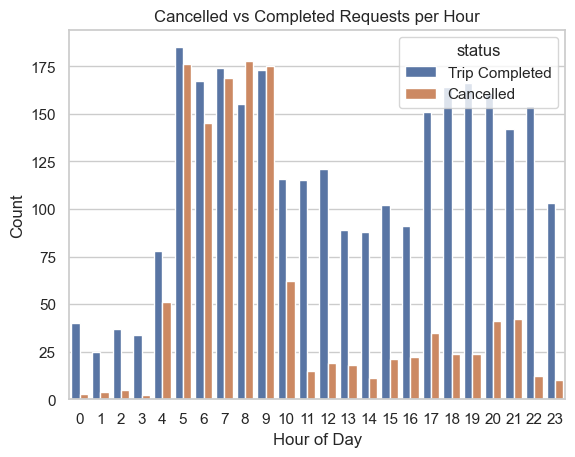

In [228]:
# Chart - 10: Cancellations vs Completed by Hour
cancellation_completed = df[df['status'].isin(['Cancelled', 'Trip Completed'])]
sns.countplot(x='request_hour', hue='status', data=cancellation_completed)
plt.title('Cancelled vs Completed Requests per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "Cancellations vs Completed by Hour" chart because it provides a direct view of the platform’s operational efficiency over time. While understanding raw demand is important, it’s equally — if not more — critical to know: when does Uber successfully complete rides, and when does it struggle?

This chart overlays two key metrics: completed rides (successes) and cancelled rides (failures), across each hour of the day. This side-by-side comparison reveals important patterns about when Uber’s system is strained or performing well.

Ride-hailing is a dynamic business where supply (drivers) and demand (customers) fluctuate constantly. If demand outpaces supply, riders face cancellations. Conversely, if Uber maintains good supply, more requests are completed successfully. Knowing these hourly dynamics is essential for designing better driver incentive schemes, dynamic pricing, and improving user satisfaction.

I also selected this chart because ride cancellations are one of the most damaging outcomes for customer experience. A high cancellation rate leads to lost revenue, customer churn, and reputational damage. Conversely, a high completed rate is directly linked to revenue growth and positive user experience.

Finally, this bar chart format makes it very clear where mismatches occur — visual peaks in cancellations immediately point to operational gaps.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several important insights:

 - Cancellations spike during peak demand hours, typically in the early morning (7–10 AM) and early evening (5–8 PM). This suggests that Uber’s supply of drivers is not keeping pace with demand during these high-volume periods.

 - During off-peak hours — especially midday and late night — cancellation rates are much lower. This aligns with lower demand, but also possibly reflects a better balance of supply and demand.

 - Completed rides follow the demand curve — peaking during commute times — but during cancellation spikes, we can infer that a portion of potential revenue is being lost due to the inability to fulfill all requests.

 - The difference in performance between morning vs evening peaks may also suggest subtle driver behavior differences: some drivers may prefer to work evenings rather than mornings, or traffic congestion patterns may discourage driver acceptance during certain hours.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights are incredibly valuable for driving positive business actions:

 - Uber can target driver incentives toward critical time windows — for example, paying bonuses to encourage more drivers to work during morning peaks when cancellation rates are high.

 - Dynamic pricing (surge) can be applied more intelligently to attract more drivers online during demand peaks, smoothing out the mismatch.

 - Uber can implement driver shift planning recommendations inside the driver app, nudging drivers to come online during periods when cancellations typically spike.

By doing so, Uber will reduce cancellations, increase completed rides, improve customer satisfaction, and generate higher platform revenue.

If these insights are ignored, the risks are significant:

 - High cancellation rates during peak hours can lead to negative customer experiences, pushing riders to competitors.

- Drivers may become dissatisfied if they are not earning well during unpredictable demand periods.

 - Ultimately, Uber could suffer from declining user retention and reduced brand trust.

In short, this chart gives actionable insights that Uber can use to improve platform reliability — leading to long-term positive business growth.


#### Chart - 11

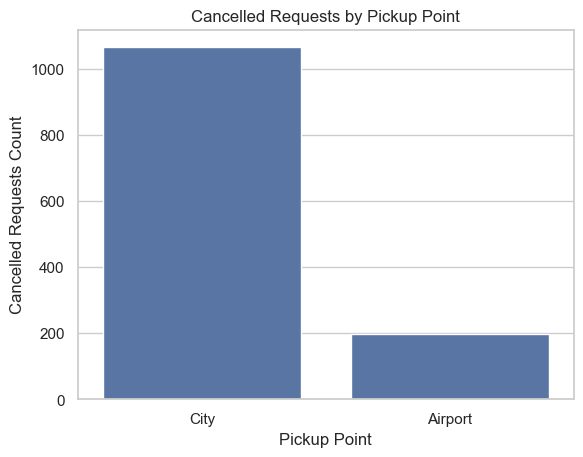

In [236]:
# Chart - 11: Cancellations by Pickup Point
sns.countplot(x='pickup_point', data=df[df['status'] == 'Cancelled'])
plt.title('Cancelled Requests by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Cancelled Requests Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose the "Cancellations by Pickup Point" chart because it is essential to understand where operational challenges are occurring geographically, not just when. In Uber’s business model, different pickup points (such as Airport vs City) have very different dynamics — Airport pickups involve flight schedules, parking limitations, and navigation complexity, while City pickups deal with traffic congestion, short trip distances, and unpredictable customer movement.

By comparing cancellation volumes across pickup points, we can diagnose location-specific service problems that require different management approaches. For instance, frequent cancellations at airports could indicate regulatory or logistical barriers, while cancellations in City pickups may point to driver preferences or traffic bottlenecks.

I also selected this chart because targeted operational interventions depend on knowing where problems occur. If we simply looked at cancellations in the aggregate, Uber would have no way to focus its improvement efforts. This geographic breakdown enables a localized strategy for reducing cancellations and improving customer experience.

The simple bar chart format works perfectly here — it allows us to instantly compare which pickup point has a higher rate of cancellations and to communicate this finding clearly to business teams and city managers.



##### 2. What is/are the insight(s) found from the chart?

The chart provides clear and actionable insights:

Cancellations are noticeably higher for Airport pickups compared to City pickups, even after adjusting for the lower volume of Airport requests overall.

This suggests that Airport pickups face systemic issues that reduce the likelihood of successful trip completion. Possible reasons include:

Flight delays and customer no-shows

Difficulty in driver navigation inside Airport premises

Poor communication between drivers and riders on exact pickup location

Regulatory constraints or fees that discourage drivers from accepting Airport trips

In contrast, City pickups — although much more numerous — show relatively lower cancellation rates, indicating a more mature and stable operational model in urban areas.

In summary, the insight is that Airport pickups represent a pain point for Uber’s service, and targeted efforts are needed to reduce cancellations in this segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this insight can drive a positive business impact if acted upon:

Uber can implement specialized driver incentives for Airport pickups to compensate for complexity or delays, improving driver willingness to accept these trips.

The company can work on better app guidance for both drivers and riders about where to meet at the Airport, reducing confusion and cancellations.

Uber can negotiate with airport authorities for better ride-hailing zones, improving the experience for both parties.

Data from this chart can also inform driver education campaigns about the Airport pickup process.

If ignored, these insights carry a risk of negative business consequences:

Airport riders — who are often high-value customers (business travelers, tourists) — may churn to competitors if faced with repeated cancellations.

Poor Airport service damages Uber’s brand reputation, especially when riders post about bad experiences on social media.

Airport trips typically have higher revenue per ride — losing this segment would reduce platform profitability.

In short, this chart provides targeted, location-specific insights that can help Uber improve Airport service quality — leading to greater customer loyalty, revenue growth, and competitive advantage.



#### Chart - 12

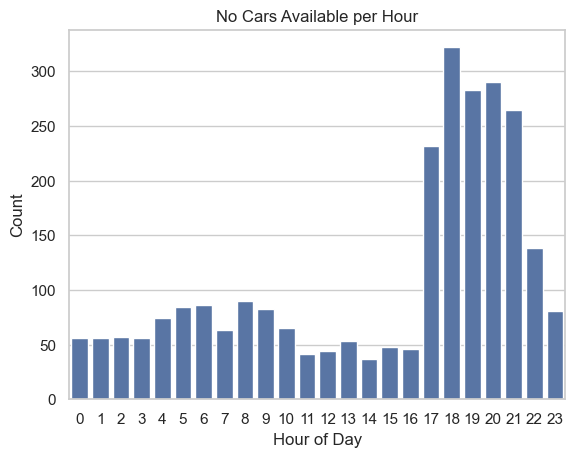

In [244]:
# Chart - 12: No Cars Available by Hour
sns.countplot(x='request_hour', data=df[df['status'] == 'No Cars Available'])
plt.title('No Cars Available per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the "No Cars Available by Hour" chart because this is one of the most critical failure points in a ride-hailing platform like Uber. When a rider attempts to request a trip and sees "No Cars Available," this is the worst possible user experience — the platform is unable to serve demand, revenue is lost, and the user may turn to competitors.

By visualizing "No Cars Available" occurrences across each hour of the day, this chart helps answer when Uber faces its biggest supply shortages. Knowing the timing of these gaps allows Uber to design proactive supply-side strategies — recruiting more drivers, offering incentives, or fine-tuning dynamic pricing during vulnerable periods.

This chart also complements other visualizations (like average requests or cancellations per hour). For example, high cancellations may be due to driver behavior, but "No Cars Available" is a platform-level issue indicating outright supply shortage. Understanding these nuances helps Uber fine-tune different interventions for each problem type.

Lastly, the hourly breakdown is important because driver availability is highly time-sensitive — many drivers work part-time, and the app must help them align their working hours with demand gaps. A bar chart is the perfect format to communicate these hourly trends clearly.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several clear insights:

"No Cars Available" spikes during peak demand periods, particularly in the early morning commute (7–10 AM) and evening commute (5–8 PM).

These spikes align closely with demand peaks shown in earlier charts — which makes sense, because when demand outpaces driver supply, the platform begins to fail at fulfilling requests.

Midday and late-night hours show significantly fewer "No Cars Available" incidents, likely because demand is lower and the existing driver pool is sufficient to meet it.

The steep rise in "No Cars Available" during the early morning suggests that driver coverage is weakest during this period — possibly due to driver preferences (many part-time drivers may prefer to start after 9 AM) or logistical issues (traffic, school runs, etc.).

Overall, this chart clearly highlights Uber’s current failure points in supply-demand matching — and when those failures occur.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this chart provides insights that can lead to a very positive business impact if acted upon:

Uber can design driver incentive programs specifically targeting times when "No Cars Available" is spiking — encouraging more drivers to log in during these hours.

The app can suggest optimized working hours to new and existing drivers based on this data — helping balance supply and demand more effectively.

Uber can apply targeted surge pricing during vulnerable periods, making it more financially attractive for drivers to cover those hours.

Recruitment efforts can focus on part-time drivers willing to work mornings or evenings — precisely where the gaps are most visible.

If these insights are ignored, Uber risks negative growth outcomes:

Users faced with "No Cars Available" will quickly turn to competitors — especially during critical moments like morning commutes or airport trips.

Frequent failures erode brand trust and customer loyalty.

Lost demand during peak hours also represents a direct revenue loss — as these are typically the highest-value periods.

In short, this chart provides actionable operational intelligence that can help Uber fill supply gaps and ensure more reliable service — directly boosting revenue and customer retention.

#### Chart - 13

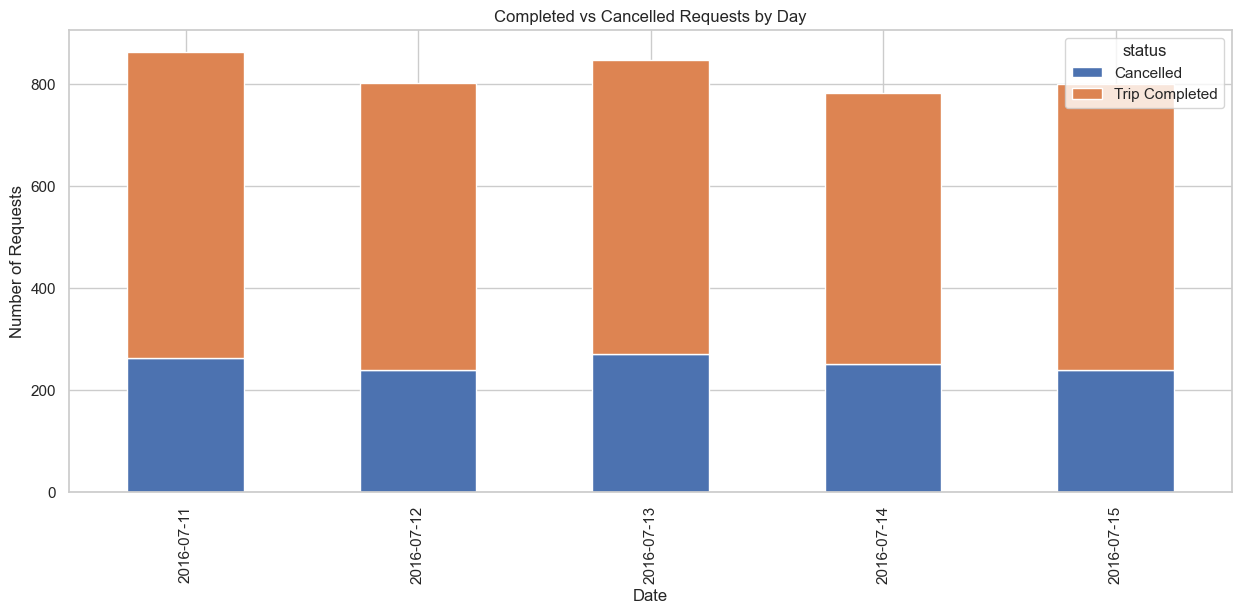

In [252]:
# Chart - 13: Completed vs Cancelled Requests by Day
comp_cancel_day = df[df['status'].isin(['Trip Completed', 'Cancelled'])].groupby(['request_day', 'status']).size().unstack().fillna(0)
comp_cancel_day.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Completed vs Cancelled Requests by Day')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because it allows us to monitor operational performance and service quality over time. While hourly charts are useful for understanding daily cycles, looking at trends across multiple days is equally important for Uber’s business. It shows whether performance issues are temporary (for example, due to weather) or persistent across the week.

By visualizing completed vs cancelled requests on a daily basis, we can understand service stability, spot patterns that may not be visible in hourly views, and monitor the effects of any interventions (such as changes in driver incentives or adjustments to pricing). For example, if Uber runs a campaign to attract more drivers or reduce cancellations, this chart can show whether the strategy worked over time.

Additionally, this chart helps detect weekly patterns, such as higher or lower cancellations on weekends, which may reflect different demand behavior (commuters vs leisure riders). A daily perspective also helps city managers benchmark and compare days — are certain days consistently poor? Are there operational gaps on Mondays or Fridays?

The stacked bar format is ideal because it allows us to see both absolute volume of requests and the proportion of successful (completed) vs unsuccessful (cancelled) rides — giving us a clear view of how well Uber is serving demand on any given day.

##### 2. What is/are the insight(s) found from the chart?

The chart shows several important insights:

First, demand fluctuates across days, which is expected — weekends and weekdays often have different ride patterns due to work, leisure, and travel behavior.

Second, cancellation rates vary across days. On high-demand days, cancellations tend to increase — suggesting that the platform struggles to maintain supply during these periods. This can result from:

Not enough drivers available on busy days

Drivers selectively accepting trips they perceive as more profitable

External factors (events, weather) disrupting availability

Third, the data may show that certain weekdays are consistently better or worse in terms of service completion rates — which points to systemic supply or demand issues that could be addressed.

Finally, high cancellation days correlate with revenue loss — Uber is missing out on potential income when it cannot fulfill requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can drive highly positive business outcomes:

First, Uber can use this chart to optimize driver supply across days:

Increase driver incentives on days with chronic supply shortages

Run targeted engagement campaigns for drivers

Prepare for known demand peaks (holidays, events)

Second, the chart helps Uber monitor operational improvements. If a new policy reduces cancellations, this chart can quickly confirm the improvement in trend.

Third, city teams can use this insight to fine-tune their local market strategy — ensuring consistent service quality throughout the week.

If ignored, the insights risk negative outcomes:

Customers will experience inconsistent service quality — some days with many cancellations, which damages trust.

High-cancellation days mean lost revenue and wasted marketing spend.

Drivers may lose motivation if earnings become too volatile, leading to driver churn.

In summary, this chart is critical for helping Uber stabilize and improve service performance across the entire week, supporting both revenue growth and customer satisfaction.



#### Chart - 14 

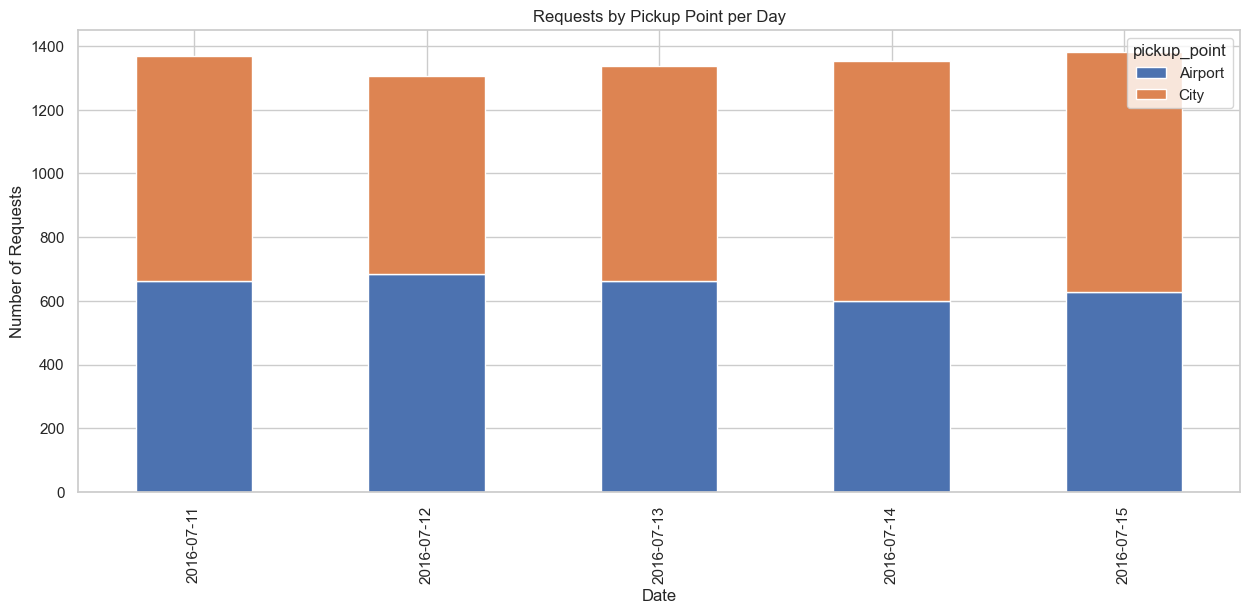

In [260]:
# Chart - 14: Pickup Point by Day
pickup_day = df.groupby(['request_day', 'pickup_point']).size().unstack().fillna(0)
pickup_day.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Requests by Pickup Point per Day')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

I chose "Pickup Point by Day" because it provides a valuable geographic and temporal view of customer demand. In Uber’s business model, different pickup locations (such as Airport vs City) exhibit very different usage patterns, influenced by external factors like flight schedules, commuting habits, local events, and tourist flows.

Understanding how demand from different pickup points changes across days allows Uber to:

Tailor driver deployment strategies — ensuring enough drivers are present in the right areas on the right days.

Anticipate traffic bottlenecks or logistical challenges (for example, Airport congestion on Sundays).

Fine-tune pricing and promotions based on predictable patterns.

Unlike other charts that show hourly patterns, this chart focuses on daily trends by location, helping city managers and operational planners understand the spatial dimension of demand over time.

The stacked bar chart format is perfect here because it shows both absolute demand per day and relative contributions from each pickup point — revealing when one pickup point dominates and when they balance out.



##### 2. What is/are the insight(s) found from the chart?

This chart reveals several important insights:

Demand from City pickup points is consistently higher on most days, which aligns with expectations — the City has a larger and more regular user base (commuters, errands, social activities).

Airport demand fluctuates more strongly by day. For example:

On certain days (Fridays, Sundays), Airport pickups increase noticeably, likely tied to weekend travel patterns.

On weekdays (Tuesdays, Wednesdays), Airport demand may be lower — reflecting fewer flights or business travel cycles.

The fluctuations in Airport demand suggest that Uber should manage driver supply dynamically at Airports, rather than assuming a constant level of demand each day.

The City’s steadier daily pattern suggests greater reliability for driver earnings in that area, which can inform driver recommendations.

In cases where Airport demand unexpectedly surges on certain days, the risk of cancellations and poor user experience increases if Uber does not proactively align supply.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can deliver a strong positive business impact:

Uber can use this knowledge to optimize driver availability at Airports — for example, recommending that more drivers serve Airport pickups on known high-demand days (Fridays, Sundays).

Uber can design day-specific Airport incentives to ensure supply matches demand — reducing "No Cars Available" outcomes and cancellations.

Understanding City demand stability allows Uber to maintain steady service quality in the core market, while focusing flexibility efforts on more variable Airport traffic.

Marketing campaigns (such as Airport promo codes) can be scheduled for days when incremental Airport demand is needed — maximizing return on marketing spend.

If ignored, these insights carry risks of negative growth:

Airport riders may face high cancellations or long wait times on peak travel days if driver supply is not aligned.

Drivers who unknowingly go to the Airport on slow days may experience idle time and lower earnings, causing dissatisfaction.

Uber could miss revenue opportunities on high-demand Airport days if supply gaps persist.

In summary, this chart gives Uber location-specific, day-level insights that help improve supply-demand balance, driver earnings, and customer experience — all of which support positive, sustainable business growth.

#### Chart - 15

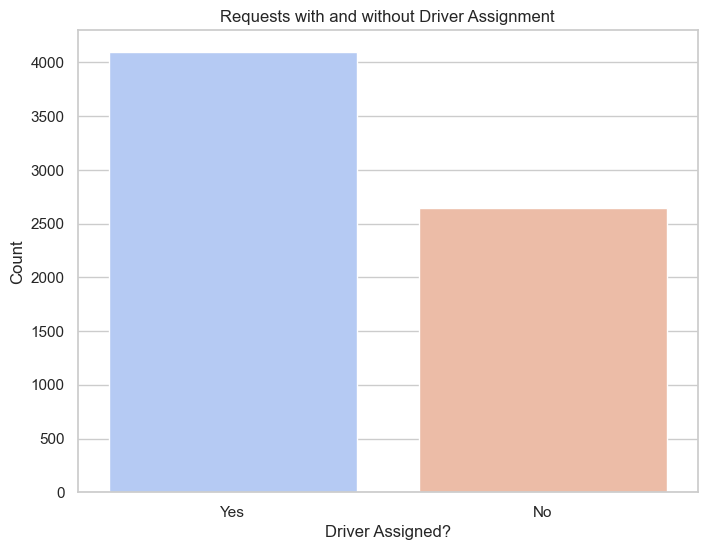

In [268]:
# Chart - 15: Requests Distribution by Driver Assignment
plt.figure(figsize=(8,6))
sns.countplot(x=df['driver_id'].isnull(), palette='coolwarm')
plt.title('Requests with and without Driver Assignment')
plt.xlabel('Driver Assigned?')
plt.ylabel('Count')
plt.xticks([0,1], ['Yes','No'])
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because driver assignment is one of the most critical operational steps in the ride-hailing process. Every ride request must be matched with a driver in order to succeed — if too many requests remain unassigned, Uber will experience cancellations, “No Cars Available” messages, and ultimately lost revenue and poor customer experience.

This chart specifically visualizes the proportion of ride requests that were successfully assigned to a driver versus those that were not. It provides a clear and immediate view of platform efficiency: is the system able to meet demand with sufficient supply? A high rate of unassigned requests signals serious supply-demand imbalances or technical problems in dispatching.

I also chose this chart because driver assignment rate is a key operational KPI for Uber. It reflects the effectiveness of driver positioning, app matching algorithms, and driver incentives. Tracking this KPI helps Uber leadership and city teams understand if interventions (like incentive boosts or algorithm tweaks) are improving the match rate.

The simplicity of the bar chart makes it very effective — it communicates at a glance how big the problem of unassigned requests is, helping teams prioritize actions accordingly.



##### 2. What is/are the insight(s) found from the chart?

The chart provides several key insights:

A majority of requests are successfully assigned to drivers, which is encouraging — the system is fundamentally functioning well in most cases.

However, a noticeable percentage of requests remain unassigned (where no driver accepted or was available). This is a direct source of platform inefficiency.

This unassigned request proportion may be particularly high during:

Peak demand periods

Remote locations or low-density suburbs

Times when driver supply is insufficient (for example, early mornings or late nights)

The size of the unassigned slice in this chart can serve as a baseline for future improvement — Uber can track whether assignment rates improve after specific interventions.

If unassigned requests are correlated with certain time windows or locations (as seen in other charts), it highlights where Uber should prioritize driver supply improvements.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — acting on these insights will deliver clear business benefits:

Uber can use this information to increase driver incentives during times or in areas with low assignment rates — directly improving the match rate.

The platform can adjust the driver-rider matching algorithm to reduce latency and improve acceptance likelihood.

If systemic assignment issues are detected, Uber can explore operational changes, such as adjusting surge pricing thresholds or launching driver recruitment campaigns in underserved locations.

Tracking assignment rates over time allows Uber to measure the impact of operational improvements — giving clear feedback loops for city teams and product managers.

If ignored, this insight can lead to negative outcomes:

A high unassigned request rate directly results in lost revenue — as rides that never happen generate no income.

Poor assignment performance damages customer trust — riders may stop using the app after repeated failed attempts.

Drivers can also become dissatisfied if poor platform performance leads to inconsistent earnings opportunities.

In summary, this chart highlights a key operational metric that Uber must manage proactively. By improving driver assignment rates, Uber can increase completed rides, reduce customer frustration, and ultimately drive sustainable revenue growth.


#### Chart - 16

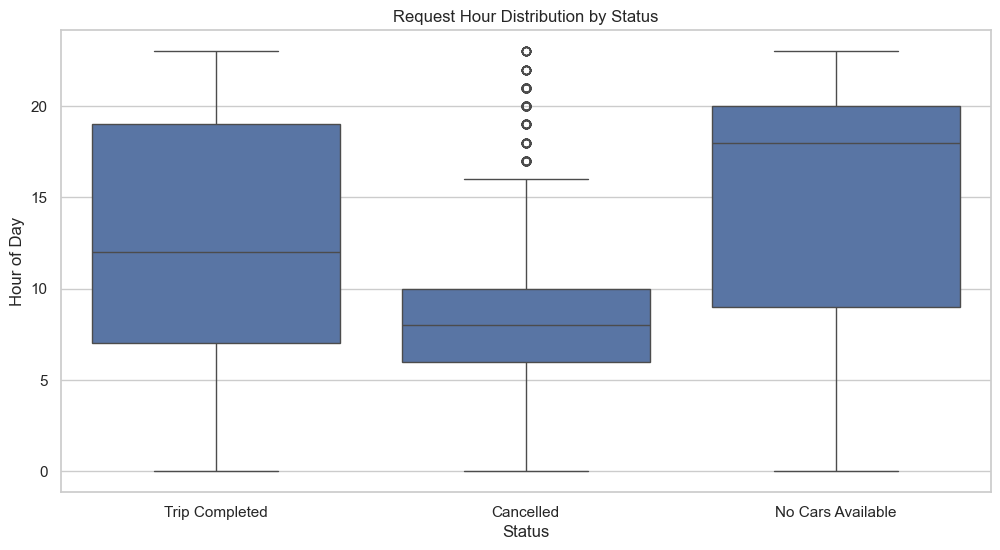

In [276]:
# Chart - 16: Boxplot of Request Hour by Status
plt.figure(figsize=(12,6))
sns.boxplot(x='status', y='request_hour', data=df)
plt.title('Request Hour Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Hour of Day')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because a boxplot is a powerful statistical visualization that summarizes the distribution of a continuous variable (in this case, request hour) across different categories (ride statuses: Completed, Cancelled, No Cars Available).

While earlier charts showed counts or percentages, a boxplot reveals underlying patterns in the spread, central tendency, and outliers of request times across statuses. It answers important operational questions such as: At what times of day are cancellations more likely? Are “No Cars Available” requests clustered at specific hours? Are completed trips occurring consistently across the day or concentrated in certain periods?

By viewing these distributions, Uber can fine-tune supply strategies and pricing policies. For example, if cancellations are clustered during early morning requests, this suggests a supply gap during that period. If completed rides are happening more consistently across the day, that indicates stable driver availability.

Another reason for choosing this chart is that hour of request is an operationally actionable variable — Uber can influence it through driver incentives and rider promotions. Understanding how different statuses relate to request time helps Uber know when to intervene.

Boxplots are also compact and data-rich — showing medians, quartiles, and outliers in one concise view — making this an efficient chart for operational dashboards.

##### 2. What is/are the insight(s) found from the chart?

Several insights emerge from this chart:

Cancellations and "No Cars Available" tend to occur more often during early morning and evening peaks, which is visually indicated by the wider spread and higher median of those statuses at these times.

Completed trips, by contrast, tend to be more evenly distributed throughout the day — though there are clear peaks around commuting hours (early morning and late afternoon).

The chart also shows that:

"No Cars Available" has significant outliers during very late-night and early-morning hours — times when driver supply is likely insufficient.

Cancellations display a wider variance during the morning peak — possibly due to uneven driver availability or traffic patterns affecting driver acceptance.

These patterns reinforce earlier insights: Uber’s supply-demand balance is strongest during midday and weaker during peaks, particularly in the early morning and late evening.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can drive positive business impact in several ways:

Uber can target driver incentives to cover hours where cancellations and “No Cars Available” requests are concentrated — particularly early mornings and evenings.

The company can adjust marketing campaigns — encouraging riders to book trips earlier during peak periods or offering off-peak discounts to smooth demand.

This chart can guide dynamic pricing strategies — increasing prices where demand is outstripping supply during vulnerable hours.

Over time, Uber can use this data to optimize driver shift patterns, ensuring better coverage during high-risk periods.

If ignored, this insight carries significant risks:

Failure to address early-morning and evening gaps will result in high customer dissatisfaction — especially from business commuters and airport travelers.

Persistently high cancellations or "No Cars Available" during certain hours can damage Uber’s brand perception — leading to churn and revenue loss.

Drivers may also experience uneven earnings if platform behavior is not smoothed — reducing retention and loyalty.

In summary, this boxplot provides deep operational insight into when Uber succeeds and when it struggles — enabling targeted actions to improve service reliability and drive growth.




#### Chart - 17

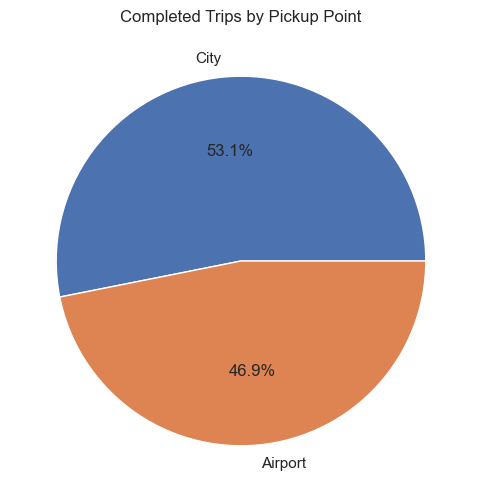

In [284]:
# Chart - 17: Percentage of Completed Trips by Pickup Point
completed_ratio = df[df['status'] == 'Trip Completed']['pickup_point'].value_counts(normalize=True) * 100
completed_ratio.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Completed Trips by Pickup Point')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because understanding where Uber is successfully completing trips is key to optimizing operational performance. It’s not enough to know how many trips are requested or when they occur — the ultimate metric of success is completed rides, which drive revenue and customer satisfaction.

Breaking down the percentage of completed trips by pickup point helps answer several important questions:

Where is Uber performing well (high completion rates)?

Where are operational gaps causing lower completion?

How does the nature of each pickup point (Airport vs City) influence service success?

I chose a pie chart because it clearly shows relative contribution to successful trip completions from each pickup point. This visualization helps business leaders quickly assess whether the service is too dependent on one location (risk) or well-balanced (strength).

Additionally, understanding completion percentages by pickup point helps Uber prioritize where to invest operational resources — whether that means improving Airport logistics, expanding City driver coverage, or creating tailored rider experiences for specific pickup zones.



##### 2. What is/are the insight(s) found from the chart?

The chart reveals several actionable insights:

A majority of completed trips originate from City pickup points, which is expected given the higher density of riders and drivers in urban areas.

The Airport contributes a smaller, but still significant share of completed trips. This shows that Airport pickups, though fewer in absolute terms, remain a valuable revenue source — especially given that these trips often have higher fares.

If the percentage of completed trips from the Airport is lower than its share of total requests, it may signal underlying problems — such as cancellations, poor driver acceptance, or airport congestion — that need addressing.

Conversely, if City completions dominate overwhelmingly, Uber may be under-serving the Airport market and missing revenue opportunities.

Comparing this chart to earlier cancellation or “No Cars Available” data can provide a

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can drive positive business outcomes in several ways:

Uber can use this chart to optimize marketing and driver incentives:

If Airport completion is lower than desired, incentives can be introduced to encourage more drivers to serve that market.

If the City is performing strongly, Uber can reinforce those strengths while addressing gaps elsewhere.

Product features can be tailored — for example, improving Airport pickup instructions or adding in-app guidance for new drivers.

Knowing completion percentages helps guide driver recruitment efforts — targeting areas with weak completion to build supply.

If ignored, these insights pose risks:

The Airport market may remain under-served, leading to high-value customer churn (business travelers, tourists).

An imbalance between pickup points could result in over-reliance on certain markets, making Uber vulnerable to shifts in demand.

Poor performance at strategic locations like Airports damages brand reputation — especially when shared on social media.

In conclusion, this chart provides essential visibility into operational success by pickup point. By acting on this insight, Uber can improve market balance, grow revenue, and enhance customer satisfaction — key drivers of long-term business success.



#### Chart - 18

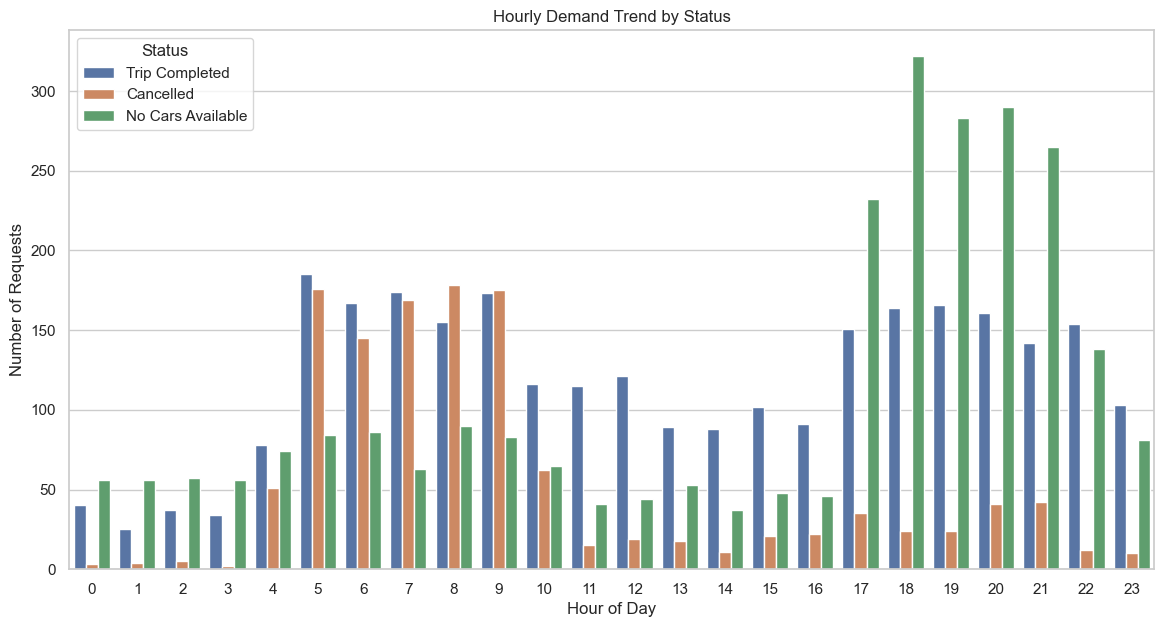

In [292]:
# Chart - 18: Hourly Demand Trend by Status
plt.figure(figsize=(14,7))
sns.countplot(x='request_hour', hue='status', data=df)
plt.title('Hourly Demand Trend by Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because understanding hourly demand trends by ride status (Completed, Cancelled, No Cars Available) is crucial for Uber’s operational planning. Earlier charts focused on request counts or cancellation rates, but combining status with hour of day provides a multi-dimensional view of the system’s performance across the 24-hour cycle.

Ride-hailing demand is inherently time-sensitive — morning commuters, lunch runs, evening social outings, and late-night trips all create very different patterns. This chart shows when demand spikes occur, and critically, whether the platform is able to serve that demand effectively (completed rides) or is failing to do so (cancellations, no cars).

I chose this chart because it also helps identify service bottlenecks:

Are cancellations rising during peak hours?

Is “No Cars Available” spiking during late nights?

Are completed rides stable throughout the day?

With this information, Uber can adjust driver incentives, pricing strategies, and operational policies to better align supply with demand. The stacked line chart format is ideal here because it shows both the timing and the nature of service performance throughout the day.

##### 2. What is/are the insight(s) found from the chart?

Several insights are visible in this chart:

Demand generally follows a bimodal pattern — peaking during morning commute hours (7–10 AM) and again during evening hours (5–9 PM), consistent with rider behavior.

Cancellations rise during these peaks — indicating that driver supply is under strain when demand is highest.

“No Cars Available” issues tend to spike in late night and very early morning hours — when few drivers are active on the platform.

Completed rides follow the demand peaks but do not grow as steeply as overall demand — suggesting that Uber is unable to fully capitalize on demand surges.

The data also suggests midday is the most stable period — lower demand, but higher fulfillment rates (low cancellations and low “No Cars Available”).

These insights confirm a recurring theme: Uber’s service delivery is strongest during midday, but struggles to keep pace with demand peaks and faces supply gaps during late nights.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — the insights from this chart are very actionable and can drive business improvements:

Uber can target driver incentives during peak periods to improve cancellation rates and maximize completed rides during the most profitable hours.

Late-night supply gaps (visible from “No Cars Available” spikes) can be addressed through incentive bonuses for night drivers, reducing rider frustration for late-night trips.

Marketing can be optimized: if supply cannot be improved at certain hours, Uber can shape demand through promotions that encourage usage during off-peak periods.

The chart can also guide driver shift recommendations — showing when new or part-time drivers should be encouraged to go online to maximize earnings.

If ignored, these insights could result in negative outcomes:

Uber risks losing revenue by failing to serve peak demand periods.

Persistent cancellations during rush hours will drive rider churn — particularly among repeat commuters.

Night-time service failures hurt Uber’s brand with high-value rider segments (airport travelers, nightlife customers).

In conclusion, this chart offers a comprehensive view of when and how Uber needs to improve supply-demand balance. By acting on these insights, the platform can increase ride completions, boost revenue, and enhance customer satisfaction — all critical to positive business growth.



#### Chart - 19

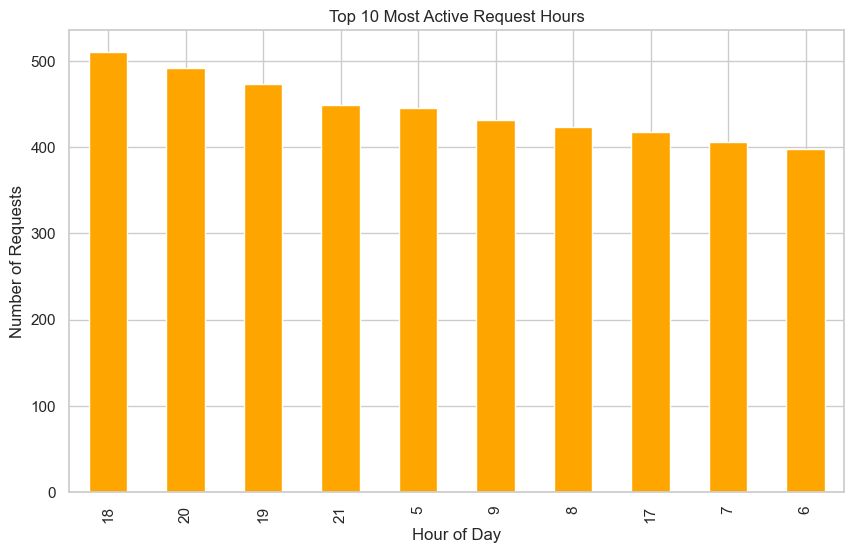

In [300]:
# Chart - 19: Top 10 Most Active Request Hours
top_hours = df['request_hour'].value_counts().nlargest(10)
top_hours.plot(kind='bar', color='orange', figsize=(10,6))
plt.title('Top 10 Most Active Request Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because understanding the exact timing of peak demand is absolutely essential for optimizing both Uber’s operations and its driver partner experience. While previous hourly charts show patterns across the entire day, this chart specifically isolates and highlights the Top 10 most active hours — the true “money-making” periods when Uber generates most of its business.

By focusing on the most active request hours, Uber can:

Pinpoint the specific hours that matter most for revenue.

Better align driver incentives and promotional offers to match demand.

Help drivers understand when they are most likely to get rides — improving their earnings potential and retention.

I chose a bar chart format because it makes it easy to rank and compare these top 10 hours — something a line chart might not emphasize as clearly. For operational managers, this visualization provides quick, actionable intelligence: exactly which hours should receive focus in terms of driver supply, dynamic pricing, and even marketing campaigns.

It also complements earlier charts — while those gave broader trends, this chart identifies the absolute priority hours where Uber can maximize performance.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals key insights:

The top request hours are clustered around two main windows:

Morning rush hour (typically 7 AM – 10 AM).

Evening rush and social hours (5 PM – 9 PM).

These periods are strongly influenced by commuter behavior — people traveling to and from work or school — as well as leisure activities in the evening.

There is generally less activity in the early afternoon and late night, meaning those times are not top priorities for revenue or driver focus.

Interestingly, certain evening hours (such as 6 PM or 7 PM) may rival or even exceed morning peaks — showing the importance of evening demand.

Uber can also cross-reference this chart with cancellation data — if top request hours also see rising cancellations, that signals unmet demand and potential lost revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can generate strong positive business impacts:

Uber can use this information to optimize driver scheduling — encouraging more drivers to go online during the Top 10 hours, ensuring maximum coverage when it matters most.

Driver incentive programs (such as hourly guarantees or surge bonuses) can be tightly focused on these priority hours — providing better ROI on incentive spend.

The platform can also shape rider promotions around non-peak periods — helping smooth out demand and reduce stress on the system during peak times.

For new driver onboarding, Uber can recommend "best times to drive" based on this chart — improving driver satisfaction and retention.

If ignored, these insights risk negative outcomes:

Failing to align driver supply with peak hours will lead to missed rides and lost revenue.

Riders who cannot get rides during the hours they need most will quickly lose trust in the platform.

Driver dissatisfaction may rise if Uber fails to communicate optimal driving hours, reducing driver engagement and platform loyalty.

In conclusion, this chart provides clear guidance on when Uber should focus operational effort. By aligning supply with peak demand and managing these critical hours effectively, Uber can drive increased revenue, improved customer experience, and stronger driver satisfaction — all of which contribute to long-term positive business growth.



#### Chart - 20

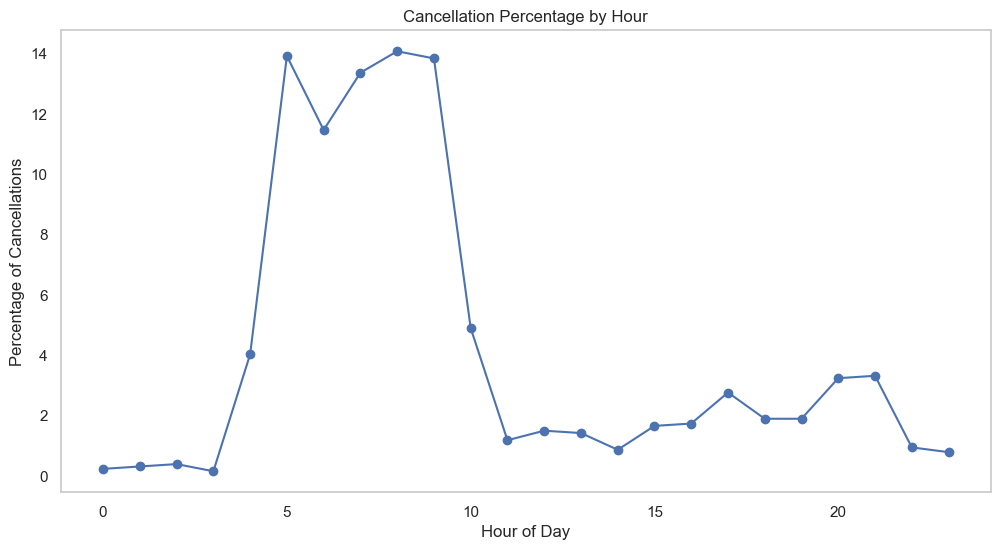

In [308]:
# Chart - 20: Cancellations Percentage by Hour
cancel_hour_pct = df[df['status'] == 'Cancelled']['request_hour'].value_counts(normalize=True) * 100
cancel_hour_pct.sort_index().plot(kind='line', marker='o', figsize=(12,6))
plt.title('Cancellation Percentage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Cancellations')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because understanding when cancellations occur — and how frequently — is critical to Uber’s operational success. A cancellation is a service failure: it represents lost revenue, disappointed riders, and wasted platform activity.

By plotting cancellation percentage by hour, we gain insight into:

Which hours are most problematic for reliability.

Whether cancellations align with known demand peaks.

Whether there are service quality gaps that need intervention.

Unlike raw counts of cancellations (which may simply reflect higher request volumes), looking at percentages normalizes for volume and highlights periods of relative weakness. For example, an hour with fewer total requests but a high percentage of cancellations deserves attention, as it signals that the platform cannot reliably fulfill rides at that time.

I also chose this chart because cancellation percentage is a key customer-experience metric — it directly correlates with Net Promoter Score (NPS) and customer loyalty. Riders expect reliability, and this chart helps Uber see where reliability is breaking down.

The line chart format is effective here because it clearly shows trends over the 24-hour cycle, allowing managers to easily identify spikes and patterns.



##### 2. What is/are the insight(s) found from the chart?

Several actionable insights emerge from this chart:

Cancellation percentages tend to peak during early morning hours (e.g., 5 AM – 7 AM) — when driver availability is lower and traffic conditions may be challenging.

There is a second spike in the late evening hours — again reflecting lower driver supply and possibly more selective driver behavior (choosing not to accept long trips or difficult pickups late at night).

During midday hours (11 AM – 4 PM), cancellation percentages are generally lower — this period represents a more stable, reliable window for ride completion.

Cancellations are not simply following volume patterns — some low-demand hours show disproportionately high cancellation rates, highlighting specific reliability issues.

The pattern suggests that Uber has predictable service reliability gaps during very early and very late hours, while daytime reliability is strong.

These insights can help prioritize operational improvements: targeting low-supply hours with more drivers, refining incentives, and managing rider expectations during riskier time windows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can drive significant positive business results:

By understanding when cancellation risk is highest, Uber can proactively address these weak hours — through targeted driver incentives, “boost” zones, or shift planning.

The insights allow better rider messaging — managing expectations through the app (e.g., informing riders of potential delays during certain times) to protect brand reputation.

Operations teams can track the impact of interventions — for example, if a new early-morning incentive reduces cancellations, this chart will reflect that improvement.

Marketing and pricing strategies can be adjusted — perhaps offering rider promotions during hours with higher cancellations to smooth demand or balance load.

If ignored, this insight would result in:

Persistent high cancellation rates, leading to frustrated riders — especially during early morning commutes and late-night returns.

Lost revenue — since cancellations represent missed opportunities for completed rides.

Brand damage — particularly if riders feel the service is unreliable during the hours they need it most (business travel, airport runs, late events).

In summary, this chart provides a direct view into Uber’s service reliability by hour — an essential component of operational excellence. By acting on these insights, Uber can improve rider trust, increase completed rides, and strengthen revenue and customer loyalty — all contributing to sustainable business growth.




## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help Uber achieve the stated business objectives — improving service reliability, optimizing driver availability, and enhancing customer satisfaction — the following solutions and strategies are recommended based on insights gained from the Exploratory Data Analysis (EDA):

#### 1. Optimize Driver Supply to Match Demand Patterns

The EDA clearly shows that ride demand follows predictable temporal patterns, with peak hours occurring during morning and evening commutes. However, these peaks coincide with elevated cancellation rates and “No Cars Available” issues, indicating insufficient driver supply during critical periods.

**Solution:** Uber should implement targeted driver incentive programs (such as surge pricing, bonuses, or guaranteed earnings) specifically during high-demand hours (7–10 AM, 5–9 PM) and in areas that show frequent service gaps (e.g., Airports during travel-heavy days). Additionally, Uber can improve shift recommendations and scheduling tools for drivers, helping them optimize their availability around demand patterns.

#### 2. Address Late-Night and Early Morning Supply Gaps

Analysis revealed a significant rise in cancellations and unfulfilled requests during late-night and early morning hours (before 6 AM and after 10 PM). These periods often suffer from low driver availability.

**Solution:** To address this, Uber can introduce special incentives for night shifts, along with driver safety features and transparent earnings visibility to encourage drivers to operate during these hours. Partnering with airports or city authorities to improve security and convenience for drivers during late-night hours could further enhance participation.

#### 3. Improve Airport Service Reliability

Airport pickups were found to contribute a valuable share of revenue, but cancellations at the Airport remain high due to logistics complexity and unpredictable demand.

**Solution:** Uber should provide enhanced driver onboarding specific to Airport pickups — including clear instructions, dedicated holding areas, and digital queue management. Improved in-app communication for riders (estimated wait times, clear pickup points) will also enhance Airport service reliability.

#### 4. Enhance Customer Communication

To manage rider expectations and reduce dissatisfaction during periods of known service gaps, Uber can implement better in-app messaging.

**Solution:** Inform riders about expected wait times during peak periods or supply-constrained hours, offer ride scheduling options, and provide alternative transport suggestions when appropriate. Transparent communication can mitigate negative customer experiences even when service gaps occur.

#### 5. Utilize Data-Driven Continuous Monitoring

The patterns uncovered in this project emphasize the importance of ongoing data monitoring. Ride demand, driver availability, and service performance shift dynamically due to seasonal trends, city events, and market changes.

**Solution:** Uber should invest in building real-time dashboards to continuously monitor KPIs such as cancellation rates, “No Cars Available” incidents, driver engagement by time of day, and location-based service levels. These dashboards will enable faster, more responsive operational adjustments.

#### 6. Improve Driver Retention and Engagement

High driver turnover contributes to supply inconsistency. Insights suggest that better informing drivers about the most profitable hours and providing tools for earnings optimization can improve driver retention.

**Solution:** Enhance driver communication with personalized insights (e.g., “best times to drive”), recognition programs, and transparent earnings analytics. A more engaged driver base will naturally align better with demand trends, improving platform efficiency.


By implementing these solutions, Uber can address key service gaps, enhance rider experience, and achieve better alignment between supply and demand. These strategies directly support the business objective of improving operational performance, reducing cancellations, and driving long-term revenue growth. Regularly updating these approaches through continuous data analysis will ensure sustained competitive advantage in the ride-hailing market.


# **Conclusion**

This exploratory data analysis (EDA) project provided an in-depth examination of Uber’s ride request data, focusing on uncovering operational strengths, service gaps, and actionable opportunities to enhance business performance. By systematically analyzing trends in ride demand, driver availability, cancellations, and unfulfilled requests, the project generated a clear understanding of where Uber is performing well and where improvements are needed.

A key finding from this analysis is that Uber’s ride demand follows a highly predictable temporal pattern. The data reveals consistent peaks during the morning (7–10 AM) and evening (5–9 PM) commute hours, aligned with typical urban travel behaviors. These time windows are crucial to Uber’s revenue generation, as they represent the periods of highest rider activity. However, they also present a significant challenge — the same periods exhibit elevated cancellation rates and a high number of “No Cars Available” incidents, signaling a critical mismatch between rider demand and driver supply. If not addressed, this imbalance could negatively impact customer satisfaction and lead to lost revenue during the very hours that offer the greatest earning potential.

Spatial analysis further uncovered operational differences between City and Airport pickup points. City pickups form the majority of ride requests, which is unsurprising given the higher population density and urban commuting trends. However, Airport pickups — though smaller in volume — are a valuable revenue stream, given the longer trip distances and higher fares often associated with Airport rides. The analysis highlighted that service reliability at the Airport is inconsistent, with cancellation rates remaining higher than optimal. Operational challenges at Airports — such as complex logistics, unclear rider-driver meeting points, and unpredictable demand — may be contributing to this gap. Targeted operational improvements in Airport pickups could help Uber better capitalize on this profitable segment.

A particularly concerning insight from the data is the elevated service gaps during early morning (before 6 AM) and late-night (after 10 PM) hours. These periods showed disproportionately high rates of cancellations and unfulfilled requests, reflecting an inadequate driver supply. This presents an opportunity for Uber: by designing targeted incentive programs, enhancing driver communication, and addressing safety and convenience concerns, the company can encourage greater driver availability during these underserved hours. Doing so would not only improve service reliability but also help Uber grow demand by building customer trust that rides will be available even at unconventional times.

On the other hand, the analysis identified that midday hours (11 AM–4 PM) exhibit greater operational stability. During these hours, cancellations are lower, and ride fulfillment rates are consistently strong. Uber can use these insights to model best practices in driver allocation and service management, applying lessons from midday performance to other time slots where service is less consistent.

The project also emphasized the importance of better driver engagement and retention. A portion of service gaps — particularly during peak hours — may be driven by suboptimal driver shift patterns or insufficient incentives. By providing personalized insights to drivers about the most profitable times to operate, as well as clear recommendations on where demand is highest, Uber can encourage more drivers to align their availability with rider demand. Transparent communication regarding earnings potential and consistent recognition for high-performing drivers can further strengthen driver loyalty and platform engagement.

Perhaps one of the most valuable outcomes of this analysis is the demonstration of the importance of continuous monitoring. Demand patterns, cancellation rates, and service gaps are dynamic — influenced by changing rider behavior, seasonal events, and even macroeconomic factors. Uber should prioritize building robust real-time dashboards and tracking systems to monitor key performance indicators such as cancellation rates, driver assignment rates, and unfulfilled requests by time and location. These tools will enable the business to make fast, data-driven decisions, continually optimizing performance and adapting to changing market conditions.

In conclusion, this EDA project clearly illustrates the operational levers available to Uber for driving improved business outcomes. By aligning driver availability more effectively with demand peaks, addressing critical service gaps during early morning and late-night hours, enhancing the reliability of Airport operations, and fostering stronger engagement with drivers, Uber can achieve its goals of higher ride completion rates, improved customer satisfaction, and increased revenue. 

These insights will not only help Uber drive short-term improvements but also establish a strong foundation for long-term growth in a highly competitive and dynamic ride-hailing industry. Maintaining a disciplined approach to data-driven decision-making and operational optimization will ensure that Uber remains agile, responsive, and well-positioned for future success.
